In [1]:
#Import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from scipy import stats
pd.set_option('display.max_columns', 100)
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
#libraries imported

# New Section #..... Data Understanding

In [3]:
Data = pd.read_csv(r'Dataset .txt')
#pd.to_csv("Assignment")
#import the dataset

# Each Column Analysis
Inspect each column in the dataset for analysis and treat accordingly

In [4]:
#Create a copy for analysis and manipulation
Analysis = Data.copy()

In [5]:
#Check the general information about the dataset like the shape, columns and datatypes
Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**This Dataset as seen here contains 21 different categories and 9551 different entries**

In [6]:
#Get all the columns from the dataset saved to  an array datatype to a variable called Columns
Columns = Analysis.columns
print(Columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


### Column One(Restaurant Id)

In [7]:
#Analysing the first column in the dataset
Analysis[Columns[0]]

0       6317637
1       6304287
2       6300002
3       6318506
4       6314302
         ...   
9546    5915730
9547    5908749
9548    5915807
9549    5916112
9550    5927402
Name: Restaurant ID, Length: 9551, dtype: int64

In [8]:
#Check the number of unique values in the column
Analysis[Columns[0]].nunique()

9551

**This shows from here that each row in the dataset is an entry for each Restaurant**

In [9]:
Analysis[Columns[0]].value_counts()

Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: count, Length: 9551, dtype: int64

*The column **Restaurant ID**  contains random numbers and as such doesn't have any hidden pattern and trends therefore it can be generally dropped as each are unique value meant to be specific to each individual*

### Column Two (Restaurant Name)

In [10]:
#Column two
Analysis[Columns[1]]

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                 Naml۱ Gurme
9547                Ceviz A��ac۱
9548                       Huqqa
9549                 A���k Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9551, dtype: object

In [11]:
#Check the amount of unique values inside the column
Analysis[Columns[1]].nunique()

7446

In [12]:
#Check the the dispersion of the data in the data set
Analysis[Columns[1]].value_counts(sort = True) 

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [13]:
#Check if there are instances where there are repeated Restaurant Names
Analysis.duplicated(subset='Restaurant Name').sum()

2105

**This here tells us that there are multiple restaurants with the same name... Maybe due to the restaurant having the same owner or maybe just a coincidence, this will be analyzed in the EDA part**

In [14]:
#Since the data is a object type, check if none of the value is a null
Analysis[Analysis[Columns[1]] == 'Nan'][Columns[1]].count()

0

In [15]:
Analysis[Columns[1]].isna().sum()

0

*The second column is named **Restaurant Name** and contains names of the restaurants in the dataset, a couple of restaurants in the dataset are repeated and may be needed to be analysed later on if no pattern is detected, then it is safe to drop*

### Third Column (Country Code)

In [16]:
Col_2 = Analysis[Columns[2]]

In [17]:
Col_2

0       162
1       162
2       162
3       162
4       162
       ... 
9546    208
9547    208
9548    208
9549    208
9550    208
Name: Country Code, Length: 9551, dtype: int64

In [18]:
Col_2.nunique()

15

In [19]:
Col_2.unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [20]:
Col_2.value_counts()

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

In [21]:
Col_2.isna().sum()

0

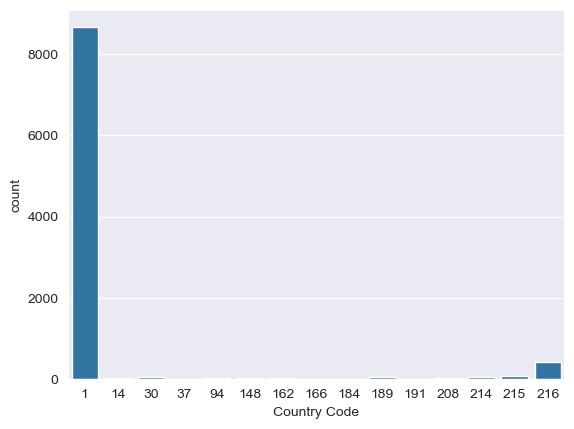

In [22]:
#Check the graphical representation of the Country codes
sns.countplot(data = Analysis, x = Columns[2])
plt.show()

*The Column **Country Codes** contains the country code for the country where the sample data was taken from... From the data, it shows that there are fifteen countries data was taken from with the country with the code '1' having more than 80% of the values in the dataset. Convert to Country Categories, this data is therefore not generalized aas it will be heavily biased to the people in living in the countries that have a Country Code of 1*

### Fourth Column (City)

In [23]:
#Fourth Column

In [24]:
Fourth = Analysis[Columns[3]]

In [25]:
Fourth

0            Makati City
1            Makati City
2       Mandaluyong City
3       Mandaluyong City
4       Mandaluyong City
              ...       
9546           ��stanbul
9547           ��stanbul
9548           ��stanbul
9549           ��stanbul
9550           ��stanbul
Name: City, Length: 9551, dtype: object

In [26]:
Fourth.nunique()

141

In [27]:
Fourth.unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

In [28]:
Fourth.value_counts()

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

In [29]:
Fourth.isna().sum()

0

In [30]:
#hue_colors = {162: 'Red', 37:'Blue', 14:'Green', 216:'Yellow', 30:'Orange'}
#plt.close()
#plt.figure(figsize= (20,15))
#sns.countplot(data = Analysis.head(250), x = Columns[3], hue = Columns[2], palette = hue_colors)
#plt.xticks(rotation = 45)
#plt.show()

In [31]:
#Check the most represented cities in the dataset(It will be expected for the cities in the ! country code have more cities)
Analysis.groupby([Columns[3]])[Columns[2]].count().sort_values(ascending=False)

City
New Delhi      5473
Gurgaon        1118
Noida          1080
Faridabad       251
Ghaziabad        25
               ... 
Dicky Beach       1
Lorn              1
Quezon City       1
Lincoln           1
Lakeview          1
Name: Country Code, Length: 141, dtype: int64

In [32]:
Analysis.groupby([Columns[3], Columns[1]])[Columns[1]].count().sort_values(ascending=False).head(100)

City       Restaurant Name            
New Delhi  Cafe Coffee Day                57
           Domino's Pizza                 55
           Subway                         38
           Green Chick Chop               37
           McDonald's                     33
                                          ..
           Aggarwal Sweet Corner           4
Mumbai     Tea Villa Cafe                  4
New Delhi  Barbeque Nation                 4
           Bikaner Sweets & Restaurant     4
           Kings Kulfi                     4
Name: Restaurant Name, Length: 100, dtype: int64

**This City Column tells about the location each restaurant is located........ and of course, there'd be more than one city with multiple restaurants, hence the reason for some restaurants occuring in more than one instance**

### Fifth Column(Address)

In [33]:
#Fifth COl

In [34]:
Fifth_Col = Analysis[Columns[4]]

In [35]:
Fifth_Col

0       Third Floor, Century City Mall, Kalayaan Avenu...
1       Little Tokyo, 2277 Chino Roces Avenue, Legaspi...
2       Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...
3       Third Floor, Mega Fashion Hall, SM Megamall, O...
4       Third Floor, Mega Atrium, SM Megamall, Ortigas...
                              ...                        
9546    Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...
9547    Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...
9548    Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...
9549    Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...
9550    Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...
Name: Address, Length: 9551, dtype: object

In [36]:
Fifth_Col.nunique()

8918

shows that there are some restaurants located in the same address

In [37]:
Analysis[Fifth_Col.duplicated()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
92,17284145,Hong Kong Cafe,216,Albany,"2700 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219100,31.615600,"Chinese, Seafood, Vegetarian",25,Dollar($),No,No,No,No,2,3.6,Yellow,Good,88
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
434,17143282,Roy's,216,Rest of Hawaii,"226 Lewers St, Honolulu, HI 96815",Waikiki,"Waikiki, Rest of Hawaii",-157.831176,21.279154,"Asian, European, Seafood",70,Dollar($),No,No,No,No,4,4.2,Green,Very Good,531
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,2500,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,41
634,3400073,The Latitude - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,No,No,1,3.9,Yellow,Good,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,2700082,The Urban Brava,1,Ranchi,"Circular Road, Near Lalpur Chowk, Lalpur, Ranchi",Lalpur,"Lalpur, Ranchi",85.335739,23.374878,"Cafe, Fast Food, North Indian",1000,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,95
9251,3900010,The Great Kabab Factory - Radisson Hotel,1,Varanasi,"Radisson Hotel, The Mall Road, Nadesar, Varanasi","Radisson Hotel, Nadesar","Radisson Hotel, Nadesar, Varanasi",82.980810,25.338373,"North Indian, Mughlai",1100,Indian Rupees(Rs.),No,No,No,No,4,3.3,Orange,Average,67
9416,6800782,The French by Simon Rogan - The Midland,215,Manchester,"The Midland, Peter Street, Deansgate, Manchest...","The Midland, Deansgate","The Midland, Deansgate, Manchester",-2.245077,53.477154,French,160,Pounds(��),No,No,No,No,4,4.3,Green,Very Good,114
9456,6400217,Willoughby & Co.,189,Cape Town,"Ground Level, Victoria Wharf, V & A Waterfront...","Victoria Wharf, V & A Waterfront","Victoria Wharf, V & A Waterfront, Cape Town",18.421000,-33.904167,"Seafood, Japanese, Sushi",570,Rand(R),No,No,No,No,4,4.4,Green,Very Good,466


In [38]:
Fifth_Col.value_counts()

Address
Dilli Haat, INA, New Delhi                                                               11
Sector 41, Noida                                                                         11
Greater Kailash (GK) 1, New Delhi                                                        10
The Imperial, Janpath, New Delhi                                                          9
Cyber Hub, DLF Cyber City, Gurgaon                                                        8
                                                                                         ..
23-24, Defence Colony Market, Defence Colony, New Delhi                                   1
28, Main Market, Defence Colony, New Delhi                                                1
Daryaganj, New Delhi                                                                      1
Ground Floor, E-23, Netaji Subhash Marg, Opposite Golcha Cinema, Daryaganj, New Delhi     1
Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, Kad۱k�_y, ��stanbul       

In [39]:
#Check to see if there are instances where repeated address correlates with restaurant name, this is done to check if the restaurants name that are
#repeating do not exist in the same address
Analysis[Analysis.duplicated(subset=['Address', 'Restaurant Name'])]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


**The Address column contains the specific address that the restaurants are located in, another insight gotten is that, the restaurants that occurs multiple times do not reside in the same address. Therefore those restaurants are most likely to be a part of an extensive Restaurant Group**

### Sixth Col (Locality)

In [40]:
#Sixth Col

In [41]:
Sixth_Col = Analysis[Columns[5]]

In [42]:
Sixth_Col

0        Century City Mall, Poblacion, Makati City
1       Little Tokyo, Legaspi Village, Makati City
2       Edsa Shangri-La, Ortigas, Mandaluyong City
3           SM Megamall, Ortigas, Mandaluyong City
4           SM Megamall, Ortigas, Mandaluyong City
                           ...                    
9546                                      Karak�_y
9547                                     Ko��uyolu
9548                                   Kuru�_e��me
9549                                   Kuru�_e��me
9550                                          Moda
Name: Locality, Length: 9551, dtype: object

In [43]:
Sixth_Col.nunique()

1208

In [44]:
Sixth_Col.value_counts()

Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Malviya Nagar                                   85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: count, Length: 1208, dtype: int64

### Seventh Column (Locality verbose)

In [45]:
Seventh_Col = Analysis[Columns[6]]

In [46]:
Seventh_Col

0       Century City Mall, Poblacion, Makati City, Mak...
1       Little Tokyo, Legaspi Village, Makati City, Ma...
2       Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...
3       SM Megamall, Ortigas, Mandaluyong City, Mandal...
4       SM Megamall, Ortigas, Mandaluyong City, Mandal...
                              ...                        
9546                                  Karak�_y, ��stanbul
9547                                 Ko��uyolu, ��stanbul
9548                               Kuru�_e��me, ��stanbul
9549                               Kuru�_e��me, ��stanbul
9550                                      Moda, ��stanbul
Name: Locality Verbose, Length: 9551, dtype: object

**This Column contains a more verbose version of the locality address**

In [47]:
Eighth_Col = Analysis[Columns[7]]

In [48]:
Eighth_Col

0       121.027535
1       121.014101
2       121.056831
3       121.056475
4       121.057508
           ...    
9546     28.977392
9547     29.041297
9548     29.034640
9549     29.036019
9550     29.026016
Name: Longitude, Length: 9551, dtype: float64

In [49]:
Ninth_Col = Analysis[Columns[8]]

In [50]:
Ninth_Col

0       14.565443
1       14.553708
2       14.581404
3       14.585318
4       14.584450
          ...    
9546    41.022793
9547    41.009847
9548    41.055817
9549    41.057979
9550    40.984776
Name: Latitude, Length: 9551, dtype: float64

### Column Ten (Cuisines)

In [51]:
#Tenth Column
Tenth_Col = Analysis[Columns[9]]

In [52]:
Tenth_Col

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [53]:
Tenth_Col.unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [54]:
Tenth_Col.nunique()

1825

*There are 1825 different types of cuisine represented in this dataset*

In [55]:
#Check random cuisine names to understand how the data are being input
Tenth_Col.sample(20)

3785                                             Pizza
2975                                      North Indian
5263                         North Indian, Street Food
321                          Breakfast, Coffee and Tea
8890                                         Cafe, Tea
2658    North Indian, Chinese, South Indian, Fast Food
4330                                         Fast Food
4688                               Mithai, Street Food
5694                   Fast Food, South Indian, Mithai
5817                             Chinese, North Indian
3559                                       Street Food
8387          American, Fast Food, Salad, Healthy Food
1997                                           Biryani
4349                             North Indian, Mughlai
5471                                      North Indian
5093                                           Biryani
1498               South Indian, Chinese, North Indian
657                                 Italian, Fast Food
1479      

In [56]:
#Check the amount of unique cuisines that is available in the dataset
Tenth_Col.nunique()

1825

*There are 1825 different cuisines represented in this dataset*

In [57]:
Tenth_Col.isna().sum()

9

In [58]:
#Check for the most popular cuisines
Tenth_Col.value_counts().head(100)

Cuisines
North Indian                                      936
North Indian, Chinese                             511
Chinese                                           354
Fast Food                                         354
North Indian, Mughlai                             334
                                                 ... 
Cafe, Continental, Italian                         10
North Indian, Chinese, South Indian, Fast Food     10
Asian, Chinese                                     10
Continental, North Indian, Chinese                 10
Brazilian                                           9
Name: count, Length: 100, dtype: int64

In [59]:
#Check the instances where the Cuisine is null
Analysis[Analysis[Columns[9]].isna() == True]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [60]:
#Save the instances where value is null to a variable incaase they are needed for analysis later
Null_Cuisine = Analysis[Analysis[Columns[9]].isna() == True]

In [61]:
#Drop Null value columns

In [62]:
Analysis.drop(Analysis[Analysis[Columns[9]].isna() == True].index, inplace = True, )

In [63]:
Analysis[Analysis[Columns[9]].isna() == True].index

Index([], dtype='int64')

In [64]:
Null_Cuisine

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [65]:
#Check if the restaurant groups have the same cuisines sold
Analysis[Analysis.duplicated(subset=['Cuisines','Restaurant Name'])]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,230,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,30
61,7301700,Garota de Ipanema,30,Rio de Janeiro,"Avenida Jo��o Alves, 56, Urca, Rio de Janeiro",Urca,"Urca, Rio de Janeiro",-43.162667,-22.947833,"Brazilian, Bar Food",80,Brazilian Real(R$),No,No,No,No,3,4.3,Green,Very Good,10
236,17334717,Chick-fil-A,216,Davenport,"320 W Kimberly Rd, Davenport, IA 52806",Davenport,"Davenport, Davenport",-90.571600,41.560400,Fast Food,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,125
245,17334846,Los Agaves,216,Davenport,"3852 N Brady St, Davenport, IA 52806",Davenport,"Davenport, Davenport",-90.568600,41.559000,Mexican,25,Dollar($),No,No,No,No,2,4.1,Green,Very Good,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,6801039,San Carlo,215,Manchester,"40-42 King Street West, Spinningfields, Manche...",Spinningfields,"Spinningfields, Manchester",-2.248848,53.481413,Italian,25,Pounds(��),No,No,No,No,2,4.3,Green,Very Good,745
9490,6517568,Jamie's Italian,189,Sandton,"Shop 00513, Building 13, High Street, Melrose ...","Melrose Arch, Melrose","Melrose Arch, Melrose , Sandton",28.068062,-26.132330,Italian,400,Rand(R),No,No,No,No,4,4.1,Green,Very Good,251
9528,6003668,Timboo Cafe,208,Ankara,"Kentpark AVM, Kat -1, Mustafa Kemal Mahallesi,...","Kentpark AVM, ��niversiteler, �ankaya","Kentpark AVM, ��niversiteler, �ankaya, Ankara",32.776255,39.908957,Cafe,70,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,79
9535,6000921,D�_vero��lu,208,Ankara,"��mitk�_y Mahallesi, 2432. Cadde (8. Cadde), N...",��mitk�_y,"��mitk�_y, Ankara",32.701775,39.891564,"Kebab, Desserts, Turkish Pizza",70,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,152


**The Column contains the Cuisine name and Cuisines has deliberate null values, i.e NAN was deliberately inputted probably due to the cuisines name not being registered or for some other unknown reason. The null value is inconsequential to the dataset, therefore it can be dropped and has been saved to a variable name called Null_Cuisine. Another insight gained is that most of the restaurants that are repeated serves the same cuisines, this further backs up the likelihood of the restaurants coming from a single Restaurant group that focuses on a single Cuisine**

### Column Eleven(Average Cost For Two)

In [66]:
#Eleventh Column
Eleventh_Col = Analysis[Columns[10]]

In [67]:
Eleventh_Col

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9542, dtype: int64

In [68]:
Eleventh_Col.unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [69]:
Eleventh_Col.nunique()

140

In [70]:
Eleventh_Col.value_counts()

Average Cost for two
500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: count, Length: 140, dtype: int64

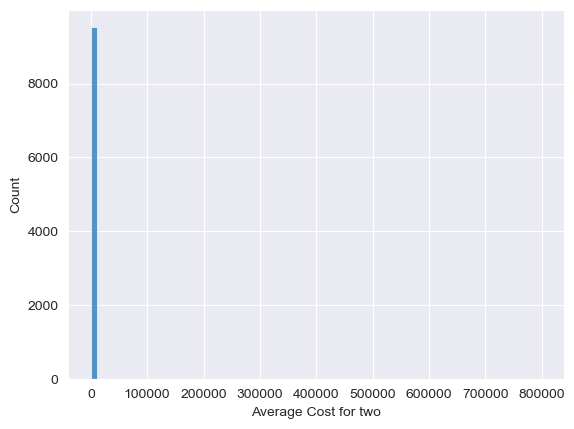

In [71]:
#Check price distribution
sns.histplot(data=Analysis[Columns[10]], bins = 70)
plt.show()

In [72]:
#Check for outlier and reason for drastic skewness of data

In [73]:
Eleventh_Col.describe()

count      9542.000000
mean       1200.326137
std       16128.743876
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

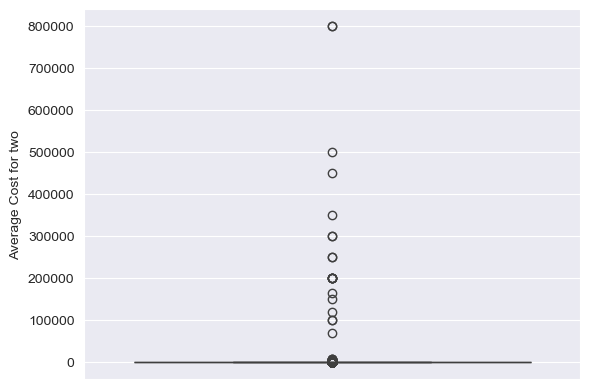

In [74]:
sns.boxplot(data= Analysis[Columns[10]] )
plt.show()

In [75]:
#Calculate the upper and lower limit of the Average cost for two column
Q1,Q3 = np.percentile((Analysis[Columns[10]].sort_values()), [25,75])
IQR = Q3-Q1
lower_limit = (Q1 - 1.5 *IQR)
upper_limit = (Q3 + 1.5 * IQR)

In [76]:
np.log(Eleventh_Col + 1).describe()

count    9542.000000
mean        5.958077
std         1.079723
min         0.000000
25%         5.525453
50%         5.993961
75%         6.552508
max        13.592368
Name: Average Cost for two, dtype: float64

In [77]:
lower_limit, upper_limit

(-425.0, 1375.0)

In [78]:
Eleventh_Col[((Eleventh_Col) > upper_limit) | ((Eleventh_Col) < lower_limit)]

2       4000
3       1500
4       1500
6       2000
7       2000
        ... 
9511    3000
9512    4500
9513    3000
9514    4000
9515    2000
Name: Average Cost for two, Length: 853, dtype: int64

In [79]:
Analysis[((Analysis[Columns[10]]) > upper_limit) | ((Analysis[Columns[10]]) < lower_limit)]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,5800316,Cricket Club Cafe,191,Colombo,"12 Flower Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",0.000000,0.000000,"Continental, American, Seafood",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,171
9512,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.853364,6.906814,"Seafood, Italian",4500,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196
9513,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.852928,6.904581,"American, Fast Food, Steak, Beverages",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286
9514,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",79.844239,6.932814,Seafood,4000,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203


In [80]:
#Check the pattern in the dataset of where the average cost for two is more than the upper limit of the distribution of  the data
Analysis[((Analysis[Columns[10]]) > upper_limit)].describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,8.530000e+02,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,5.689133e+06,8.992966,76.620743,25.246797,8962.719812,3.446659,3.700938,533.814771
std,8.003688e+06,34.408311,13.763184,8.289520,53348.310115,0.504467,0.745109,914.854577
min,5.300000e+01,1.000000,0.000000,-26.203278,1400.000000,2.000000,0.000000,0.000000
25%,5.230000e+03,1.000000,77.096886,28.457626,1500.000000,3.000000,3.500000,68.000000
50%,3.073620e+05,1.000000,77.217028,28.550158,1800.000000,3.000000,3.800000,220.000000
75%,1.813844e+07,1.000000,77.249541,28.600543,2400.000000,4.000000,4.100000,582.000000
max,1.848594e+07,191.000000,121.057508,30.905562,800000.000000,4.000000,4.900000,10934.000000


In [81]:
#Check the pattern in the dataset of where price for two is more thanm the lower limit of the whole dataset
Analysis[((Analysis[Columns[10]]) < lower_limit)].describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#Check the entries where the price isnt an outlier
Analysis[~(((Analysis[Columns[10]]) > upper_limit) | ((Analysis[Columns[10]]) < lower_limit))].describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,8.689000e+03,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000
mean,9.372579e+06,19.081022,63.063014,25.907604,438.291173,1.643803,2.563563,119.757740
std,8.797325e+06,58.090133,42.765292,11.240380,281.868263,0.764860,1.534848,325.331443
min,5.500000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.030250e+05,1.000000,77.080071,28.484096,250.000000,1.000000,2.200000,4.000000
50%,6.900992e+06,1.000000,77.190167,28.573324,400.000000,1.000000,3.100000,25.000000
75%,1.835796e+07,1.000000,77.282987,28.645565,600.000000,2.000000,3.600000,103.000000
max,1.850065e+07,216.000000,174.832089,55.976980,1350.000000,4.000000,4.900000,9667.000000


In [83]:
#Save the outlier data to a variable called Price_Outlier
Price_Outlier = Analysis[((Analysis[Columns[10]]) > upper_limit) | ((Analysis[Columns[10]]) < lower_limit)]

In [84]:
#drop the outliers
Analysis.drop(Analysis[((Analysis[Columns[10]]) > upper_limit) | ((Analysis[Columns[10]]) < lower_limit)].index, inplace = True)

In [85]:
#Check the new distribution after dropping the outliers
Analysis[Columns[10]].describe()

count    8689.000000
mean      438.291173
std       281.868263
min         0.000000
25%       250.000000
50%       400.000000
75%       600.000000
max      1350.000000
Name: Average Cost for two, dtype: float64

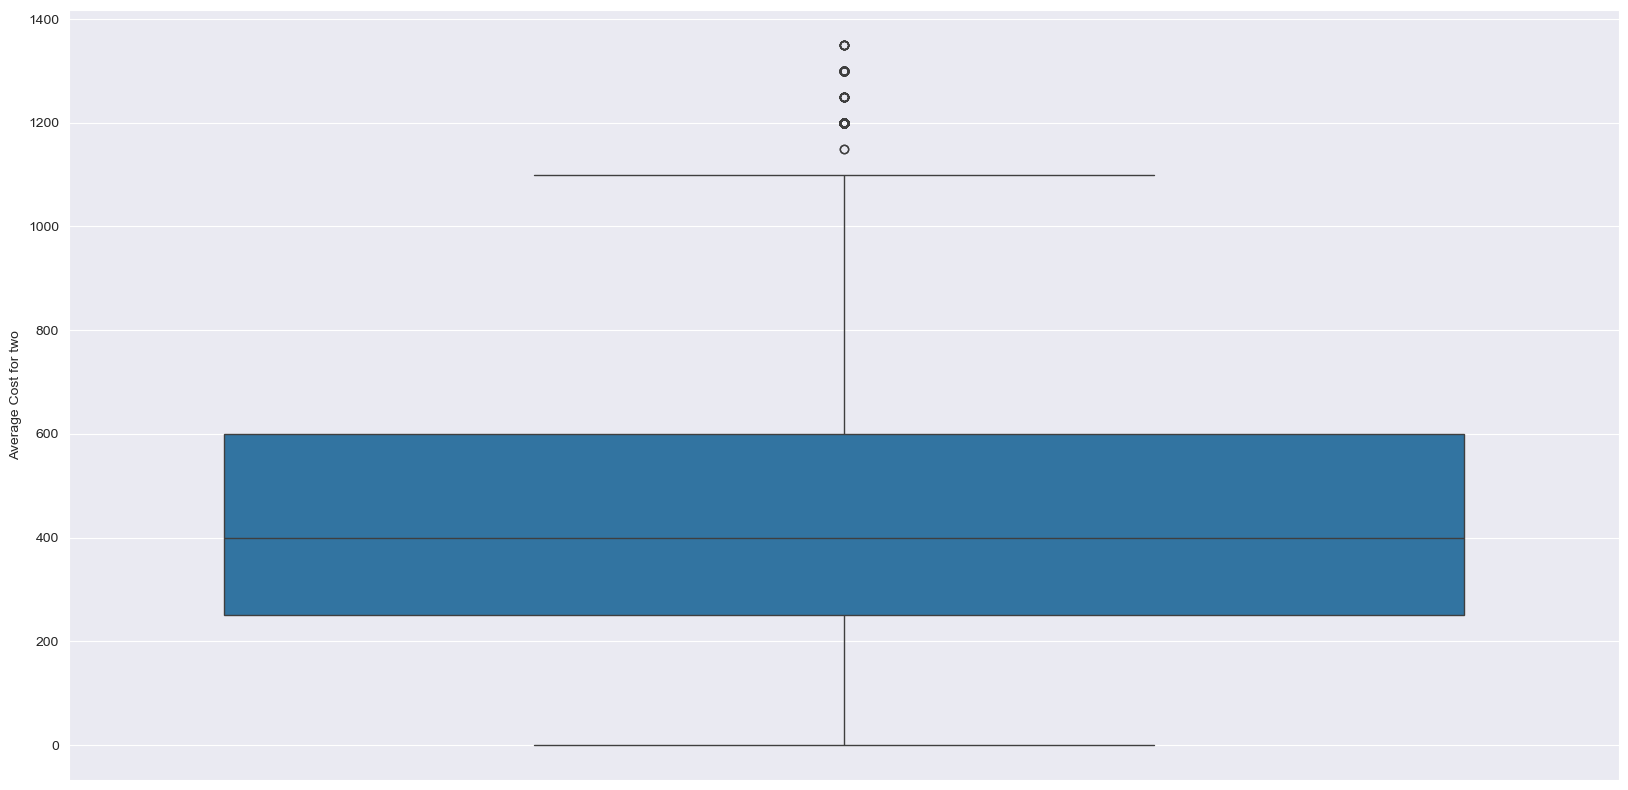

In [86]:
#Check the outlier data now that it has been cleaned
plt.figure(figsize=(20,10))
sns.boxplot(data= Analysis[Columns[10]] )
plt.show()

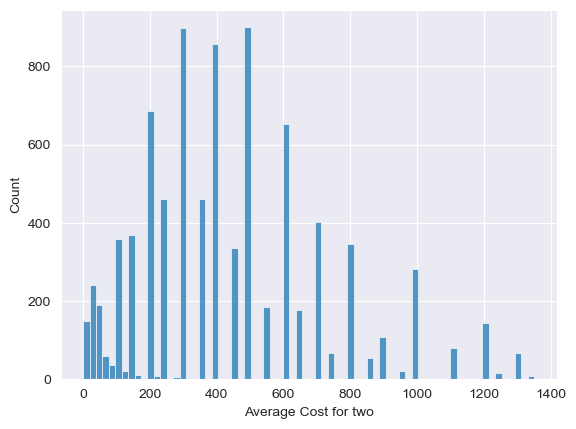

In [87]:
#Check the normal distribution of the data
sns.histplot(data=Analysis[Columns[10]], bins = 70)
plt.show()

In [88]:
Eleventh_Col.isna().sum()

0

**The Prices for two column would possibly contain the average cost for a table for two in the restaurant with a particulare cuisine... There were Outliers in the data and they were treated and saved to a variable called Price_Outlier for Analysis.... Compare Price with Average for two and check the most pricey cuisines**

### Twelfth Column(Currency)

In [89]:
#Twelfth Column
Twelfth_Col = Analysis[Columns[11]]

In [90]:
Twelfth_Col

0       Botswana Pula(P)
1       Botswana Pula(P)
5       Botswana Pula(P)
9       Botswana Pula(P)
10      Botswana Pula(P)
              ...       
9546    Turkish Lira(TL)
9547    Turkish Lira(TL)
9548    Turkish Lira(TL)
9549    Turkish Lira(TL)
9550    Turkish Lira(TL)
Name: Currency, Length: 8689, dtype: object

In [91]:
Twelfth_Col.unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)', 'NewZealand($)',
       'Pounds(��)', 'Qatari Rial(QR)', 'Rand(R)',
       'Sri Lankan Rupee(LKR)', 'Turkish Lira(TL)'], dtype=object)

In [92]:
Twelfth_Col.nunique()

11

In [93]:
Twelfth_Col.value_counts()

Currency
Indian Rupees(Rs.)       7847
Dollar($)                 473
Pounds(��)                 80
Brazilian Real(R$)         60
Emirati Diram(AED)         60
Rand(R)                    58
NewZealand($)              40
Turkish Lira(TL)           34
Qatari Rial(QR)            20
Botswana Pula(P)           13
Sri Lankan Rupee(LKR)       4
Name: count, dtype: int64

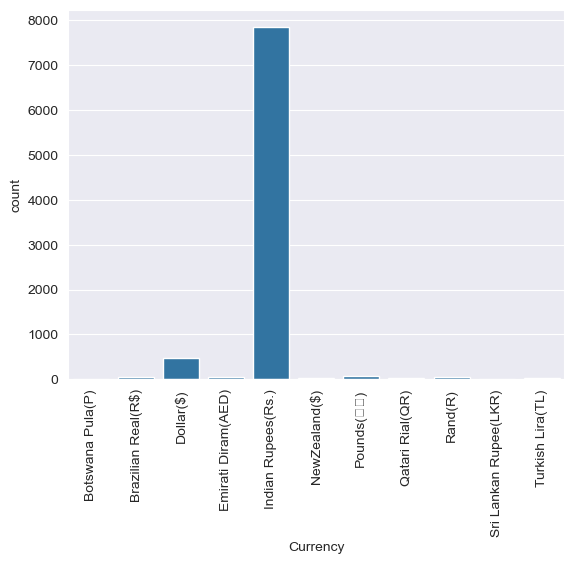

In [94]:
sns.countplot(x = Analysis[Columns[11]])
plt.xticks(rotation = 90)
plt.show()

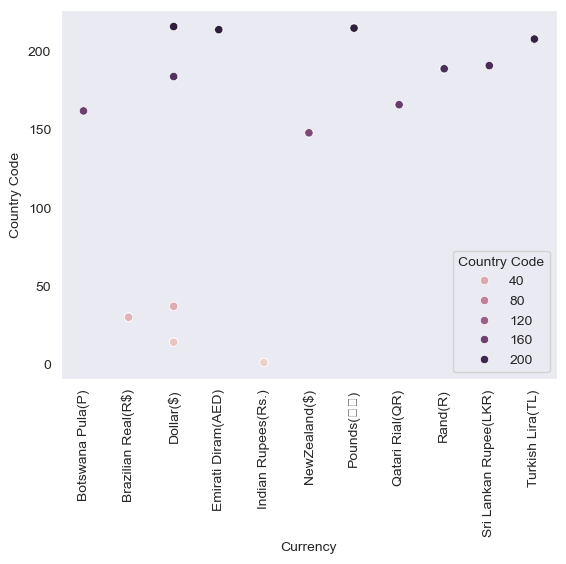

In [95]:
#Check correlation of currency and country codes
sns.set_style('dark')
sns.scatterplot(data = Analysis, x = 'Currency', y = 'Country Code', hue='Country Code')
plt.xticks(rotation = 90)
plt.show()

**This is the currency for price the Restaurante charges... Check if there is correlation with the Average price of the cuisine, this will be done during analysis and bivariate analysis. This column is indicative of the country in which the restaurante is situaterd in, Comparing currency with price**

### Thirteenth Column (Has Table Booking)

In [96]:
Thirteenth_Col = Analysis[Columns[12]]

In [97]:
Thirteenth_Col

0       Yes
1       Yes
5        No
9       Yes
10       No
       ... 
9546     No
9547     No
9548     No
9549     No
9550     No
Name: Has Table booking, Length: 8689, dtype: object

In [98]:
Thirteenth_Col.unique()

array(['Yes', 'No'], dtype=object)

In [99]:
Thirteenth_Col.value_counts()

Has Table booking
No     8100
Yes     589
Name: count, dtype: int64

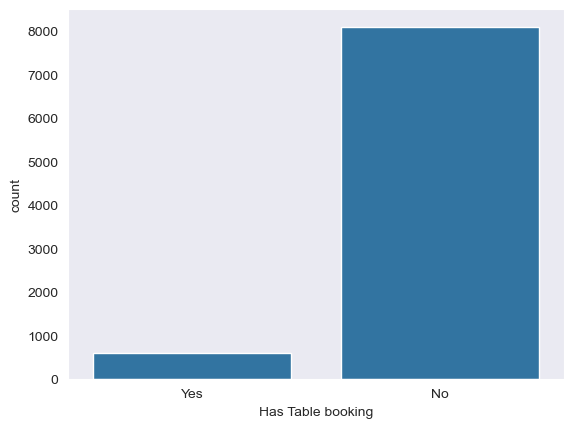

In [100]:
sns.countplot(x = Analysis[Columns[12]])
plt.show()

In [101]:
Thirteenth_Col.isna().sum()

0

**The Data here indicates if the restaurant has table booing, the data here is highly imbalanced, I'd check during analysis if the Yes has an impact on the taerget variable, if it foes use emote to balance out the data, if not, delete the column**

###  Fourteenth_Col (Has Online Delivery)

In [102]:
Fourteenth_Col = Analysis[Columns[13]]

In [103]:
Fourteenth_Col

0       No
1       No
5       No
9       No
10      No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Has Online delivery, Length: 8689, dtype: object

In [104]:
Fourteenth_Col.unique()

array(['No', 'Yes'], dtype=object)

In [105]:
Fourteenth_Col.value_counts()

Has Online delivery
No     6439
Yes    2250
Name: count, dtype: int64

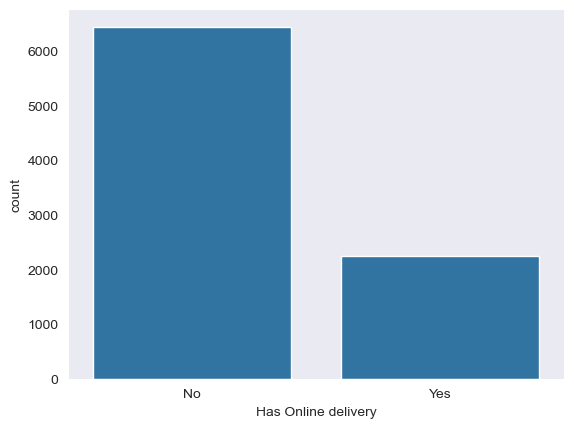

In [106]:
sns.countplot(x = Analysis[Columns[13]])
plt.show()

In [107]:
Fourteenth_Col.isna().sum()

0

**This column has the same type of data as the former column above and therefore, the same type of analysis would be done and then a comparative analysis would be done betweeen them to see if there is correlation**

### Fifteenth_Column(Is Delivering now)

In [108]:
Fifteenth = Analysis[Columns[14]]

In [109]:
Fifteenth

0       No
1       No
5       No
9       No
10      No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Is delivering now, Length: 8689, dtype: object

In [110]:
Fifteenth.unique()

array(['No', 'Yes'], dtype=object)

In [111]:
Fifteenth.value_counts()

Is delivering now
No     8655
Yes      34
Name: count, dtype: int64

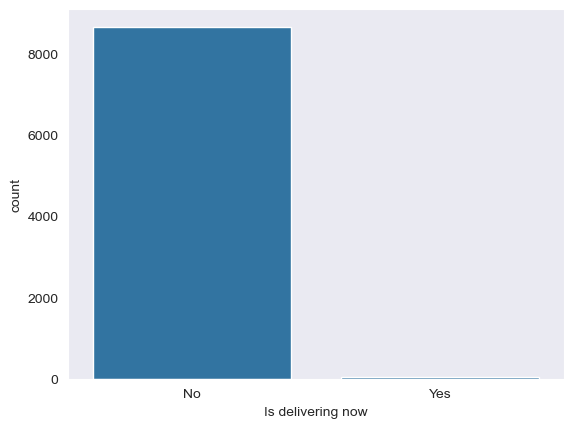

In [112]:
sns.countplot(x = Analysis[Columns[14]])
plt.show()

In [113]:
Fifteenth.isna().sum()

0

**This Column is delivering now is same as the previous two and thus, the same analysis would be done**

### Sixteen Column (Switch to order menu)

In [114]:
Sixteen = Analysis[Columns[15]]

In [115]:
Sixteen

0       No
1       No
5       No
9       No
10      No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Switch to order menu, Length: 8689, dtype: object

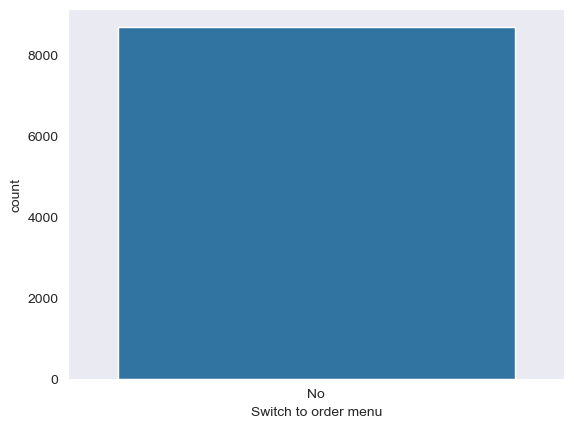

In [116]:
sns.countplot(x = Analysis[Columns[15]])
plt.show()

**This Column would be dropped as it only contains one value and it wouldnt be useful for analysis**

### Seventeenth_Col(Price_Range)

In [117]:
Seventeenth = Analysis[Columns[16]]

In [118]:
Seventeenth

0       3
1       3
5       3
9       3
10      3
       ..
9546    3
9547    3
9548    4
9549    4
9550    2
Name: Price range, Length: 8689, dtype: int64

In [119]:
Seventeenth.unique()

array([3, 2, 1, 4], dtype=int64)

In [120]:
Seventeenth.value_counts()

Price range
1    4438
2    3110
3     939
4     202
Name: count, dtype: int64

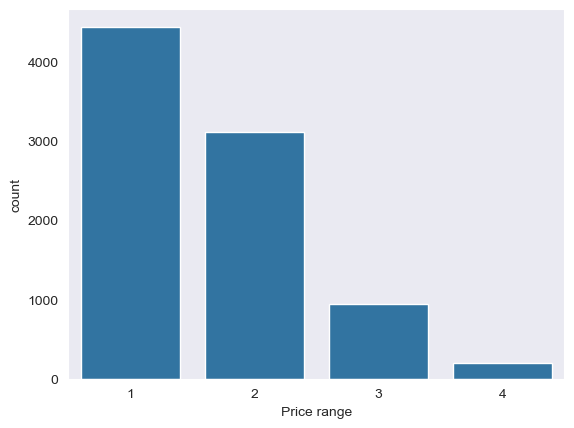

In [121]:
sns.countplot(x = Analysis[Columns[16]])
plt.show()

In [122]:
Seventeenth.isna().sum()

0

**The Price Range Column is a categorical type of data... it contains discrete quantitative value..... It is skewed towards the 1 value.. It is an important feature in this dataset and will be used extensively in analysis**

### Target_Variable (Aggregate rating)

In [123]:
Eighteenth = Analysis[Columns[17]]

In [124]:
Eighteenth

0       4.8
1       4.5
5       4.4
9       4.8
10      4.9
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 8689, dtype: float64

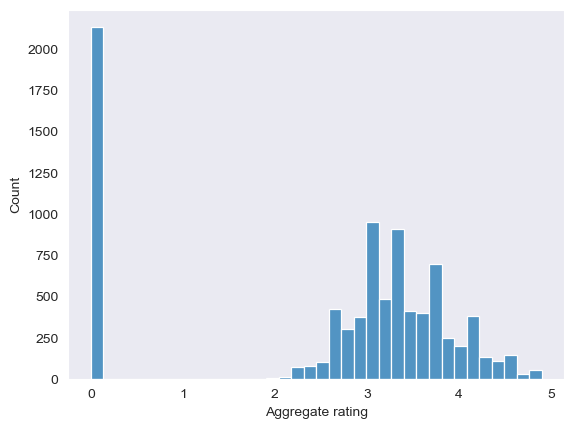

In [125]:
sns.histplot(x =  Analysis[Columns[17]])
plt.show()

In [126]:
Eighteenth.value_counts()

Aggregate rating
0.0    2130
3.1     501
3.2     488
3.4     461
3.3     449
3.0     449
3.5     416
3.6     404
2.9     376
3.7     369
3.8     326
2.8     303
3.9     249
2.7     241
4.1     214
4.0     200
2.6     183
4.2     169
4.3     134
4.4     111
2.5     106
4.5      79
2.4      79
4.6      66
2.3      47
4.9      39
4.7      33
2.2      26
4.8      19
2.1      13
2.0       6
1.9       2
1.8       1
Name: count, dtype: int64

**The target variable contains a lot of 0 values =... further analysis would be done on this to columns that correlates from face value with the target variable**

### Nineteenth (Rating Color)

In [127]:
Ninteenth = Analysis[Columns[18]]

In [128]:
Ninteenth

0       Dark Green
1       Dark Green
5            Green
9       Dark Green
10      Dark Green
           ...    
9546         Green
9547         Green
9548        Yellow
9549         Green
9550         Green
Name: Rating color, Length: 8689, dtype: object

In [129]:
Ninteenth.unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [130]:
Ninteenth.nunique()

6

In [131]:
Ninteenth.value_counts()

Rating color
Orange        3557
White         2130
Yellow        1764
Green          828
Dark Green     236
Red            174
Name: count, dtype: int64

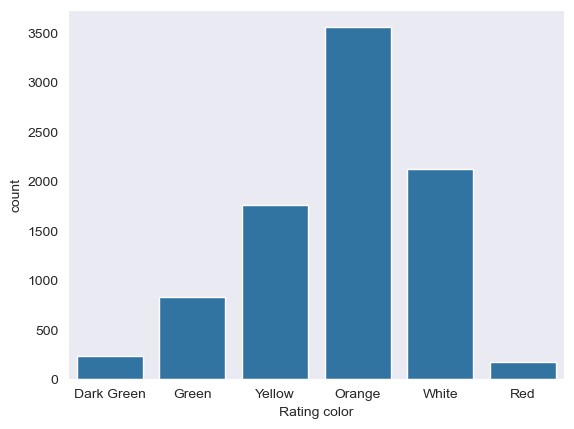

In [132]:
sns.countplot(x = Analysis[Columns[18]])
plt.show()

In [133]:
Ninteenth.isna().sum()

0

**This contains the rating color of the cuisine, therefore, it is highly correlative with the aggregate rating column(Target Variable), it'll be useful for comparism of target variables with categorical predictive variable**

In [134]:
#Check the equivalent of rating for each color
Colors = Analysis['Rating color'].unique()

In [135]:
Colors

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [136]:
Values = {}
for color in Colors:
    Values[color] = Analysis[Analysis['Rating color'] == color]['Aggregate rating'].unique()

In [137]:
Values

{'Dark Green': array([4.8, 4.5, 4.9, 4.7, 4.6]),
 'Green': array([4.4, 4.2, 4.3, 4. , 4.1]),
 'Yellow': array([3.6, 3.8, 3.7, 3.9, 3.5]),
 'Orange': array([3. , 3.2, 3.1, 3.3, 3.4, 2.9, 2.6, 2.8, 2.7, 2.5]),
 'White': array([0.]),
 'Red': array([2.2, 2.4, 2.1, 1.8, 2. , 2.3, 1.9])}

### Twentieth (Rating Text)

In [138]:
Twentieth = Analysis[Columns[19]]

In [139]:
Twentieth

0       Excellent
1       Excellent
5       Very Good
9       Excellent
10      Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 8689, dtype: object

In [140]:
Twentieth.unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

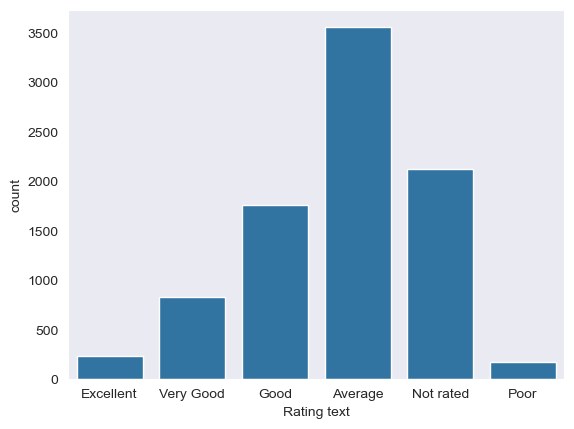

In [141]:
sns.countplot(x = Analysis[Columns[19]])
plt.show()

In [142]:
Twentieth.isna().sum()

0

In [143]:
#Check the equivalent of rating for each text
Texts = Analysis['Rating text'].unique()

In [144]:
Texts

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [145]:
Words = {}
for text in Texts:
    Words[text] = Analysis[Analysis['Rating text'] == text]['Aggregate rating'].unique()

In [146]:
Words

{'Excellent': array([4.8, 4.5, 4.9, 4.7, 4.6]),
 'Very Good': array([4.4, 4.2, 4.3, 4. , 4.1]),
 'Good': array([3.6, 3.8, 3.7, 3.9, 3.5]),
 'Average': array([3. , 3.2, 3.1, 3.3, 3.4, 2.9, 2.6, 2.8, 2.7, 2.5]),
 'Not rated': array([0.]),
 'Poor': array([2.2, 2.4, 2.1, 1.8, 2. , 2.3, 1.9])}

**This contains the rating remark of the each cuisine and it might be closely correlated**

### Twenty-First(Voting)

In [147]:
Twenty_First = Analysis[Columns[20]]

In [148]:
Twenty_First

0        314
1        591
5        336
9        532
10      1070
        ... 
9546     788
9547    1034
9548     661
9549     901
9550     591
Name: Votes, Length: 8689, dtype: int64

In [149]:
Twenty_First.nunique()

842

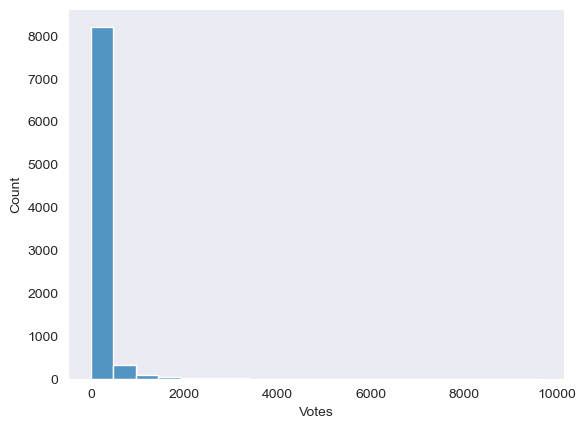

In [150]:
sns.histplot(x = Analysis[Columns[20]], bins = 20 )
plt.show()

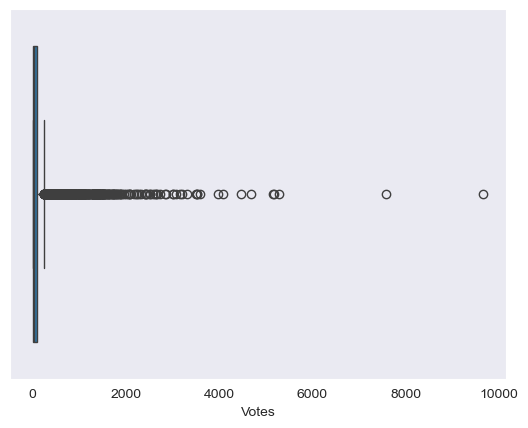

In [151]:
sns.boxplot(x=Analysis[Columns[20]])
plt.show()

In [152]:
Twenty_First.isna().sum()

0

**The votes contains a lot of outlier count, but would not be dropped as they are valid**

###### 

# Data Analysis (EDA)

### Drop irrelevant Columns from Domain knowledge

In [153]:
Analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8689 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8689 non-null   int64  
 1   Restaurant Name       8689 non-null   object 
 2   Country Code          8689 non-null   int64  
 3   City                  8689 non-null   object 
 4   Address               8689 non-null   object 
 5   Locality              8689 non-null   object 
 6   Locality Verbose      8689 non-null   object 
 7   Longitude             8689 non-null   float64
 8   Latitude              8689 non-null   float64
 9   Cuisines              8689 non-null   object 
 10  Average Cost for two  8689 non-null   int64  
 11  Currency              8689 non-null   object 
 12  Has Table booking     8689 non-null   object 
 13  Has Online delivery   8689 non-null   object 
 14  Is delivering now     8689 non-null   object 
 15  Switch to order menu  8689

In [154]:
#Major Columns to drop are... Restaurant_Id, Switch to Order menu, Address, Locality, Locality Verbose

In [155]:
Analysis.drop(columns = ['Restaurant ID', 'Switch to order menu' , 'Address' , 'Locality' , 'Locality Verbose'], inplace = True, axis =1)

In [156]:
Analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8689 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       8689 non-null   object 
 1   Country Code          8689 non-null   int64  
 2   City                  8689 non-null   object 
 3   Longitude             8689 non-null   float64
 4   Latitude              8689 non-null   float64
 5   Cuisines              8689 non-null   object 
 6   Average Cost for two  8689 non-null   int64  
 7   Currency              8689 non-null   object 
 8   Has Table booking     8689 non-null   object 
 9   Has Online delivery   8689 non-null   object 
 10  Is delivering now     8689 non-null   object 
 11  Price range           8689 non-null   int64  
 12  Aggregate rating      8689 non-null   float64
 13  Rating color          8689 non-null   object 
 14  Rating text           8689 non-null   object 
 15  Votes                 8689

In [157]:
#Restaurant Name Analysis to check the correlation of restaurant groups and the the patterns hidden in there

In [158]:
Analysis.groupby(['Restaurant Name','Country Code'])['Country Code'].count().sort_values(ascending=False).head(50)

Restaurant Name          Country Code
Cafe Coffee Day          1               83
Domino's Pizza           1               79
Subway                   1               63
Green Chick Chop         1               51
McDonald's               1               48
Keventers                1               34
Giani                    1               29
Pizza Hut                1               29
Baskin Robbins           1               28
Giani's                  1               22
Dunkin' Donuts           1               22
Barista                  1               22
Pind Balluchi            1               20
Costa Coffee             1               20
Pizza Hut Delivery       1               19
Sagar Ratna              1               19
Twenty Four Seven        1               19
Wah Ji Wah               1               19
Republic of Chicken      1               18
Chaayos                  1               18
KFC                      1               18
Starbucks                1            

**It is mostly restaurants  in the country wityh country code 1 that have reccurring restairant name**

#### Create a column that contains the countries the restaurant are in the dataset using the Country code, City and Currency

In [159]:
#Grab the values of the country code in the dataset
Values = Analysis['Country Code'].unique()
Values

array([162,  30, 216,  14,  37, 184, 214,   1, 148, 215, 166, 189, 191,
       208], dtype=int64)

In [160]:
#Using Chatgpt, I got the value of the country with  country code. and save it to a variable name called Country as a list
Countries = ['Japan', 'Greece', 'Uganda', 'Australia', 'Canada', 'Panama', 'South Africa',
             'India', 'Sri Lanka', 'Tanzania', 'Suriname', 'Seychelles', 'South Sudan', 'Swaziland']
print(len(Values), len(Countries))

14 14


In [161]:
#Create a new column and put a range of random numbers that is equal to the length
Analysis['Countries'] = np.arange(8689)
#For each time that val in Value, create an equivalent of its country in the country column
for i, val in enumerate(Values):
    for index, value in enumerate(Analysis['Country Code']):
        if Analysis['Country Code'].values[index] == Values[i]:
            Analysis['Countries'].iloc[index] = Countries[i]

In [162]:
#Check the newly created column
Analysis['Countries']

0           Japan
1           Japan
5           Japan
9           Japan
10          Japan
          ...    
9546    Swaziland
9547    Swaziland
9548    Swaziland
9549    Swaziland
9550    Swaziland
Name: Countries, Length: 8689, dtype: object

In [163]:
#Check if the Country Code and Country Column correlate
Analysis.groupby('Country Code')['Countries'].value_counts()

Country Code  Countries   
1             India           7847
14            Australia         24
30            Greece            60
37            Canada             4
148           Sri Lanka         40
162           Japan             13
166           Suriname          20
184           Panama            20
189           Seychelles        58
191           South Sudan        4
208           Swaziland         34
214           South Africa      60
215           Tanzania          80
216           Uganda           425
Name: count, dtype: int64

In [164]:
#Check if the Country match the cities
for i, value in enumerate(Countries):
    print(value)
    print(Analysis[Analysis['Countries']== value].groupby('City')['Aggregate rating'].mean().sort_values(ascending = False).head(5))
    print('-' * 50)

Japan
City
Quezon City      4.800000
Makati City      4.650000
Pasig City       4.633333
Tagaytay City    4.500000
Taguig City      4.500000
Name: Aggregate rating, dtype: float64
--------------------------------------------------
Greece
City
Rio de Janeiro    4.265
S��o Paulo        3.530
Bras�_lia         3.495
Name: Aggregate rating, dtype: float64
--------------------------------------------------
Uganda
City
Lincoln           4.500000
Orlando           4.478947
Tampa Bay         4.410000
Rest of Hawaii    4.394737
Clatskanie        4.300000
Name: Aggregate rating, dtype: float64
--------------------------------------------------
Australia
City
Beechworth       4.6
Tanunda          4.4
Palm Cove        4.4
Trentham East    4.1
East Ballina     4.1
Name: Aggregate rating, dtype: float64
--------------------------------------------------
Canada
City
Vineland Station    4.3
Chatham-Kent        3.7
Yorkton             3.3
Consort             3.0
Name: Aggregate rating, dtype: float64
-

**The Countries and city do not match**

In [165]:
#Update the countries column in the dataset using the cities
Countries = ['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada', 'Panama', 'UAE',
             'India', 'New Zealand', 'England', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey']

In [166]:
#Use the same code as in cell block to update the countries
Analysis['Countries'] = np.arange(8689)
for i, val in enumerate(Values):
    for index, value in enumerate(Analysis['Country Code']):
        if Analysis['Country Code'].values[index] == Values[i]:
            Analysis['Countries'].iloc[index] = Countries[i]

In [167]:
#Check to confirm if the city corresponds with the new countries
for i, value in enumerate(Countries):
    print(value)
    print(Analysis[Analysis['Countries']== value].groupby('City')['Aggregate rating'].mean().sort_values(ascending = False).head(5))
    print('-' * 50)

Phillipines
City
Quezon City      4.800000
Makati City      4.650000
Pasig City       4.633333
Tagaytay City    4.500000
Taguig City      4.500000
Name: Aggregate rating, dtype: float64
--------------------------------------------------
Brazil
City
Rio de Janeiro    4.265
S��o Paulo        3.530
Bras�_lia         3.495
Name: Aggregate rating, dtype: float64
--------------------------------------------------
United States
City
Lincoln           4.500000
Orlando           4.478947
Tampa Bay         4.410000
Rest of Hawaii    4.394737
Clatskanie        4.300000
Name: Aggregate rating, dtype: float64
--------------------------------------------------
Australia
City
Beechworth       4.6
Tanunda          4.4
Palm Cove        4.4
Trentham East    4.1
East Ballina     4.1
Name: Aggregate rating, dtype: float64
--------------------------------------------------
Canada
City
Vineland Station    4.3
Chatham-Kent        3.7
Yorkton             3.3
Consort             3.0
Name: Aggregate rating, dty

In [168]:
#Grab the currencies in the dataset
Currency = Analysis['Currency'].unique()

In [169]:
#Check if the Countries correlate with the currency
for value in Currency:
    print()
    print(Analysis[Analysis['Currency'] == value][['Countries','Currency']].value_counts())


Countries    Currency        
Phillipines  Botswana Pula(P)    13
Name: count, dtype: int64

Countries  Currency          
Brazil     Brazilian Real(R$)    60
Name: count, dtype: int64

Countries      Currency 
United States  Dollar($)    425
Australia      Dollar($)     24
Panama         Dollar($)     20
Canada         Dollar($)      4
Name: count, dtype: int64

Countries  Currency          
UAE        Emirati Diram(AED)    60
Name: count, dtype: int64

Countries  Currency          
India      Indian Rupees(Rs.)    7847
Name: count, dtype: int64

Countries    Currency     
New Zealand  NewZealand($)    40
Name: count, dtype: int64

Countries  Currency  
England    Pounds(��)    80
Name: count, dtype: int64

Countries  Currency       
Qatar      Qatari Rial(QR)    20
Name: count, dtype: int64

Countries     Currency
South Africa  Rand(R)     58
Name: count, dtype: int64

Countries  Currency             
Sri Lanka  Sri Lankan Rupee(LKR)    4
Name: count, dtype: int64

Countries  Curren

##### The Phillipines row has non correlating currency, city and country code, it should be dropped

In [170]:
 print(Analysis[Analysis['Currency'] == 'Botswana Pula(P)']['Country Code'])

0     162
1     162
5     162
9     162
10    162
11    162
12    162
13    162
14    162
15    162
16    162
17    162
18    162
Name: Country Code, dtype: int64


In [171]:
Analysis.drop(Analysis[Analysis['Currency'] == 'Botswana Pula(P)'].index, inplace = True)

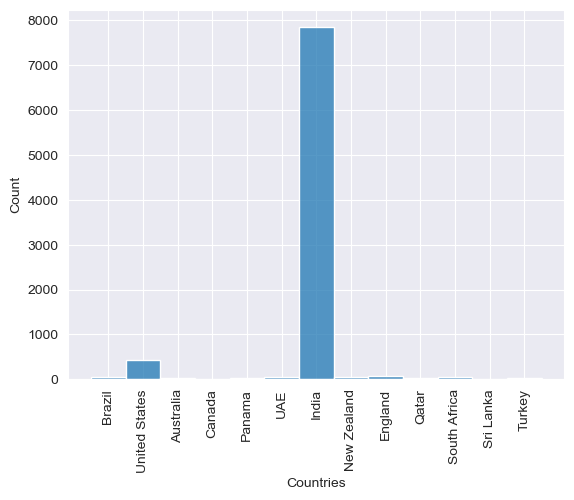

In [172]:
sns.set_style('darkgrid')
sns.histplot(data = Analysis, x = 'Countries')
plt.xticks(rotation  = 90)
plt.show()

**India is the most represented Countrybin this dataset**

### Average Cost for two and currency
#### This analysis is done to see how currency affects the average price

Here is the price distribution for Botswana Pula(P) currency
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Average Cost for two, dtype: float64
--------------------------------------------------
Here is the price distribution for Brazilian Real(R$) currency
count     60.000000
mean     134.666667
std       86.831547
min       30.000000
25%       70.000000
50%      100.000000
75%      177.500000
max      400.000000
Name: Average Cost for two, dtype: float64
--------------------------------------------------
Here is the price distribution for Dollar($) currency
count    473.000000
mean      31.792812
std       42.160802
min        0.000000
25%       10.000000
50%       25.000000
75%       40.000000
max      500.000000
Name: Average Cost for two, dtype: float64
--------------------------------------------------
Here is the price distribution for Emirati Diram(AED) currency
count     60.000000
mean     166.416667
std      109.

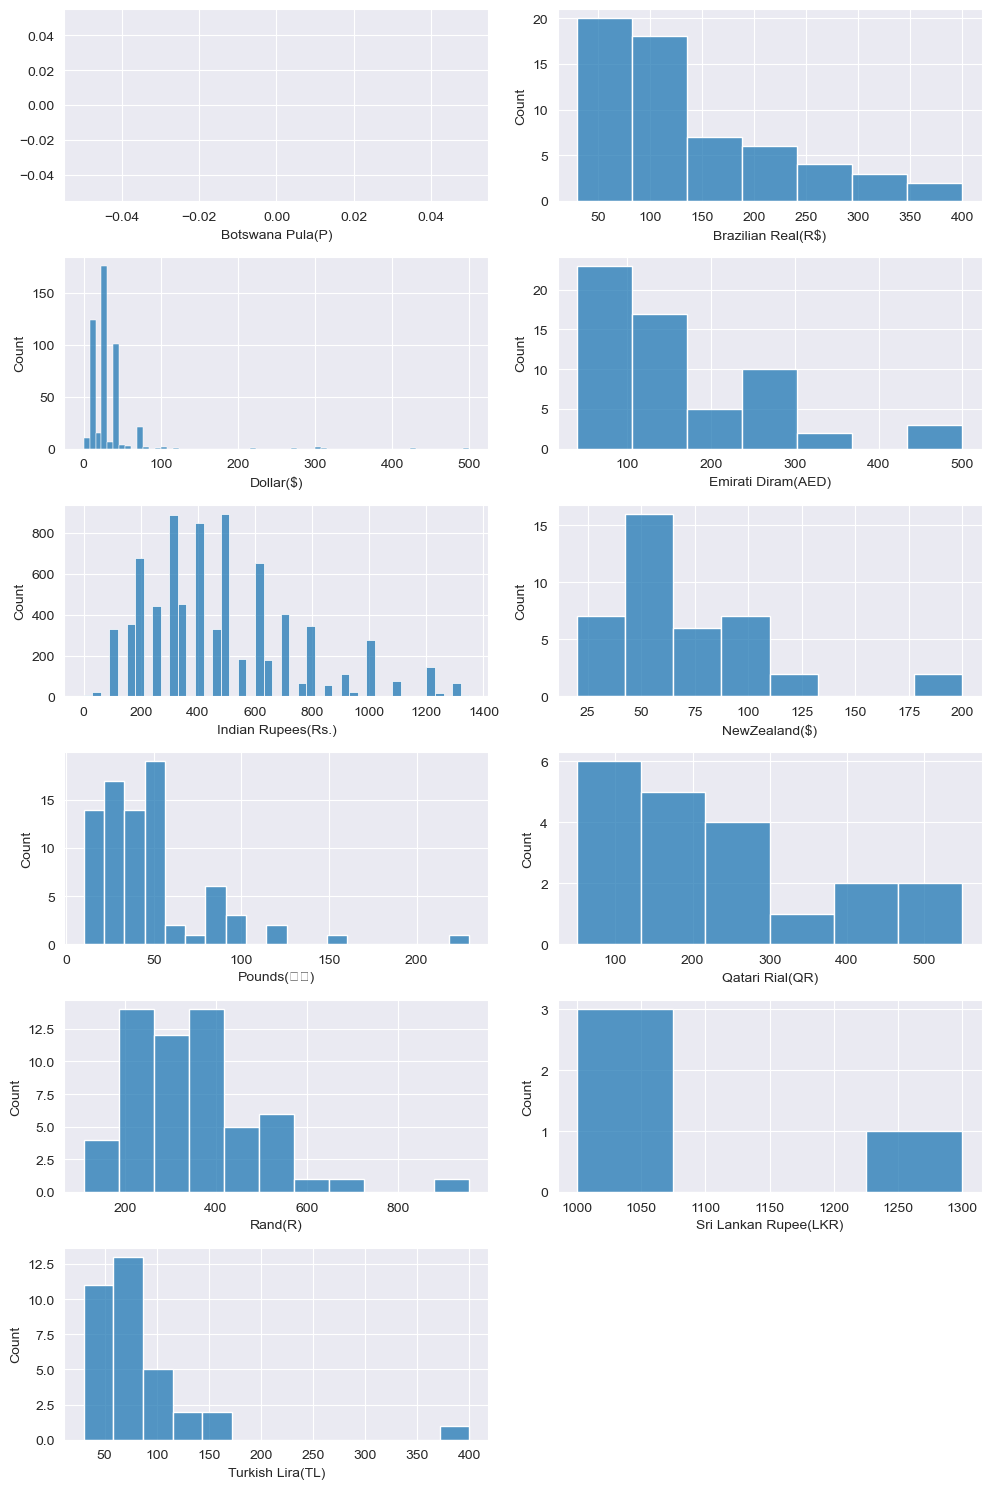

In [173]:
#Visualise the distribution for each currency and its decriptive analysis
plt.figure(figsize = (10,15))
for i,value in enumerate(Currency):
    print(f'Here is the price distribution for {value} currency')
    print(Analysis[Analysis['Currency'] == value]['Average Cost for two'].describe())
    print('-'* 50)
    plt.subplot(6,2,i+1)
    sns.histplot(x = Analysis[Analysis['Currency'] == value]['Average Cost for two'])
    plt.xlabel(value)
plt.tight_layout()
plt.show()

In [174]:
#Normalize the distribution of the average price by using a general currency for all the dataset

In [175]:
#Using dollar as the standard currency, create a list of dictionaries that contains each currency as its key and conversion rate as its value
Conversion = [{'Brazilian Real(R$)':0.19},{'Emirati Diram(AED)':0.27},
              {'NewZealand($)':0.65},{'Pounds(��)': 1.31},{'Qatari Rial(QR)': 0.27},
              {'Rand(R)': 0.062},{'Sri Lankan Rupee(LKR)': 0.0034}, {'Turkish Lira(TL)': 0.058},
              {'Indian Rupees(Rs.)': 0.012}, {'Dollar($)': 1}]

In [176]:
len(Conversion)

10

In [177]:
#Create a Global price columm and put in range of values of length of the dataset as placeholder
Analysis['Global_price'] = np.arange(len(Analysis))
#For each currency, convert the value to dollar using the value in th dictionaty and save to the Global price column
for val in Conversion:
    for key,values in val.items():
        for index, value in enumerate(Analysis['Currency']):
            if Analysis['Currency'].values[index] == key:
                Analysis['Global_price'].iloc[index] = Analysis['Average Cost for two'].values[index] * values

In [178]:
#Check the newly created global price
Analysis['Global_price']

22      10.45
23       5.70
24       8.55
25      11.40
26       9.50
        ...  
9546     4.64
9547     6.09
9548     9.86
9549     6.96
9550     3.19
Name: Global_price, Length: 8676, dtype: float64

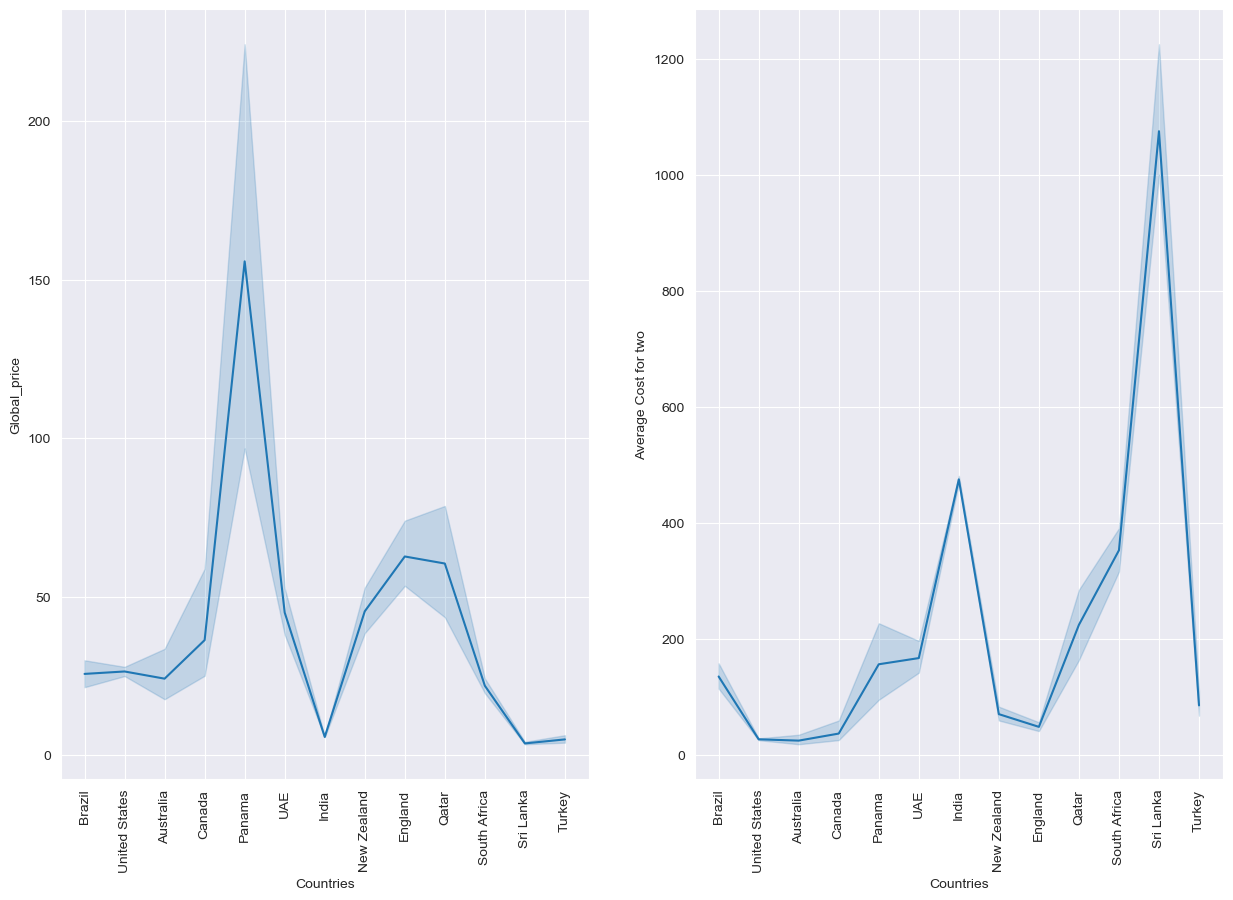

In [179]:
#Check the difference between Global_price and Average rating for two... and check if it helps for irregularity.
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.lineplot(data=Analysis, x = 'Countries',y = 'Global_price')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.lineplot(data=Analysis, x = 'Countries', y = 'Average Cost for two')
plt.xticks(rotation = 90)
plt.show()

***This shows that the distribution of the Average cost for two in respective currency is misleading as this doesnt reflect difference in currency as the average cost for two in each country is an inverse of the global price and it reduces scaling problem***

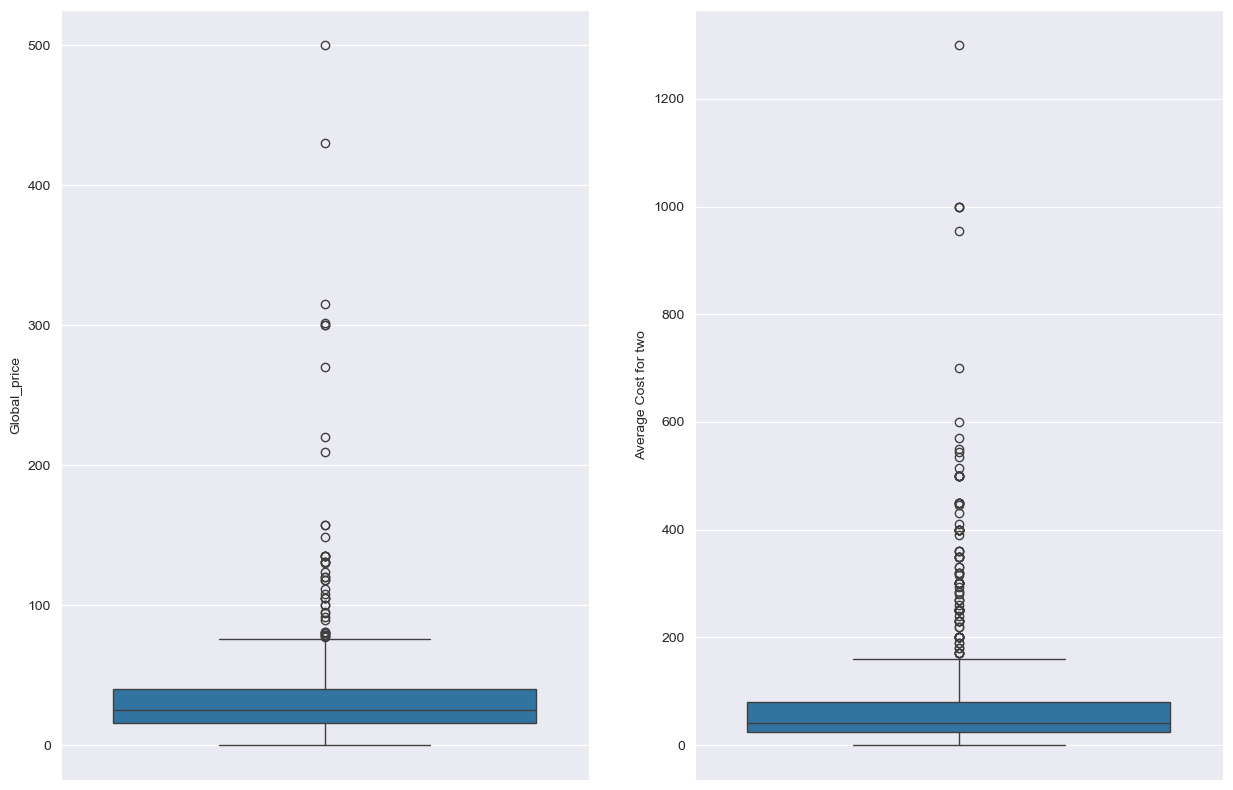

In [180]:
#Drop India in the plot of the distribution as it would cause the outlier in the data to be prominent
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data=Analysis.drop(Analysis[Analysis['Countries']== 'India'].index, axis = 0), y = 'Global_price')
plt.subplot(1,2,2)
sns.boxplot(data=Analysis.drop(Analysis[Analysis['Countries']== 'India'].index, axis = 0), y = 'Average Cost for two')
plt.show()

***In addition to beiing a moe well generalised version of Average cost for each currency, it helps in reduction of Outliers***

##### Analyse the outlier price to see if there isn't any peculiar reason as to why there is unusual price

In [181]:
Price_Outlier['Average Cost for two'].mean()

8962.719812426729

In [182]:
#Process the data and do the engineering that has been done on the general dataset thus far

In [183]:
Outlier_countries = Price_Outlier['Country Code'].unique()
print(Outlier_countries)

[162   1  94 189 191]


###### Check cities in each country code, to get the country

In [184]:
for val in Outlier_countries:
    print('-' * 50)
    print(Price_Outlier[Price_Outlier['Country Code']== val].groupby('City')['Aggregate rating'].mean().sort_values(ascending = False).head(5))

--------------------------------------------------
City
Mandaluyong City    4.700000
Taguig City         4.533333
Pasay City          4.366667
Name: Aggregate rating, dtype: float64
--------------------------------------------------
City
Nagpur      4.900000
Dehradun    4.650000
Chennai     4.533333
Kochi       4.500000
Lucknow     4.450000
Name: Aggregate rating, dtype: float64
--------------------------------------------------
City
Jakarta      4.35625
Tangerang    4.30000
Bandung      4.20000
Bogor        3.85000
Name: Aggregate rating, dtype: float64
--------------------------------------------------
City
Inner City    4.9
Pretoria      4.9
Name: Aggregate rating, dtype: float64
--------------------------------------------------
City
Colombo    3.78125
Name: Aggregate rating, dtype: float64


In [185]:
Countries = []
Cities = ['Philippines', 'India', 'Indonesia','South Africa' , 'Sri Lanka']
for i,value in enumerate(Outlier_countries):
    Countries.append({value:Cities[i]})

In [186]:
Countries

[{162: 'Philippines'},
 {1: 'India'},
 {94: 'Indonesia'},
 {189: 'South Africa'},
 {191: 'Sri Lanka'}]

In [187]:
Price_Outlier['Countries'] = np.arange(len(Price_Outlier))
for i, val in enumerate(Countries):
    for key,value in val.items():
        for index, values in enumerate(Price_Outlier['Country Code']):
            if Price_Outlier['Country Code'].values[index] == key:
                Price_Outlier['Countries'].iloc[index] =value

In [188]:
Country = Price_Outlier['Countries'].unique()
for val in Country:
    print('-' * 50)
    print(val)
    print(Price_Outlier[Price_Outlier['Countries']== val].groupby('City')['Aggregate rating'].mean().sort_values(ascending = False).head(5))

--------------------------------------------------
Philippines
City
Mandaluyong City    4.700000
Taguig City         4.533333
Pasay City          4.366667
Name: Aggregate rating, dtype: float64
--------------------------------------------------
India
City
Nagpur      4.900000
Dehradun    4.650000
Chennai     4.533333
Kochi       4.500000
Lucknow     4.450000
Name: Aggregate rating, dtype: float64
--------------------------------------------------
Indonesia
City
Jakarta      4.35625
Tangerang    4.30000
Bandung      4.20000
Bogor        3.85000
Name: Aggregate rating, dtype: float64
--------------------------------------------------
South Africa
City
Inner City    4.9
Pretoria      4.9
Name: Aggregate rating, dtype: float64
--------------------------------------------------
Sri Lanka
City
Colombo    3.78125
Name: Aggregate rating, dtype: float64


In [189]:
#Update the Conversion rate to include the new countries's conversion rate to dollar
Conversion.append({'Indonesian Rupiah(IDR)' : 0.000059})

In [190]:
Price_Outlier['Global_price'] = np.arange(len(Price_Outlier))
for val in Conversion:
    for key,values in val.items():
        for index, value in enumerate(Price_Outlier['Currency']):
            if Price_Outlier['Currency'].values[index] == key:
                Price_Outlier['Global_price'].iloc[index] = Price_Outlier['Average Cost for two'].values[index] * values

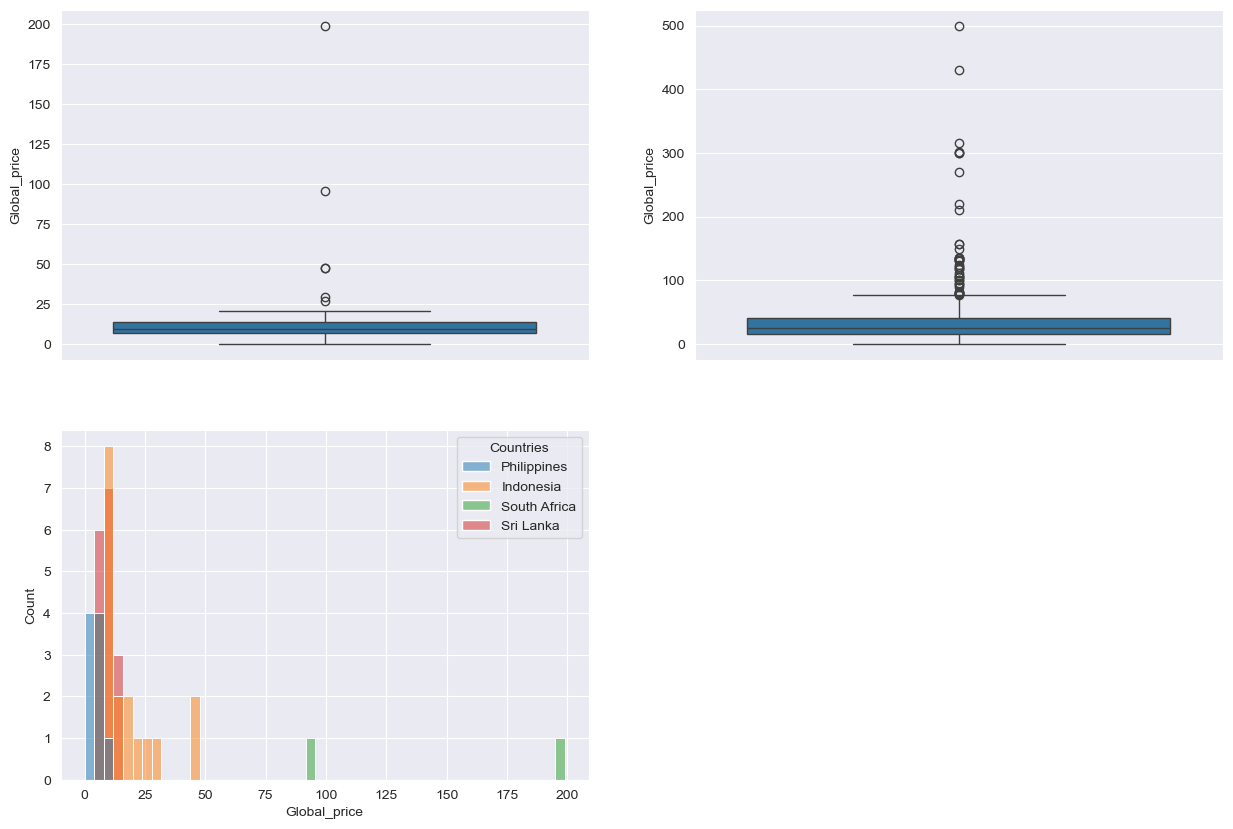

In [191]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=Price_Outlier.drop(Price_Outlier[Price_Outlier['Countries']== 'India'].index, axis = 0), y = 'Global_price')
plt.subplot(2,2,2)
sns.boxplot(data=Analysis.drop(Analysis[Analysis['Countries']== 'India'].index, axis = 0), y = 'Global_price')
plt.subplot(2,2,3)
sns.histplot(data=Price_Outlier.drop(Price_Outlier[Price_Outlier['Countries']== 'India'].index, axis = 0), x = 'Global_price', hue = 'Countries')
plt.show()

In [192]:
Price_Outlier.drop(Price_Outlier[Price_Outlier['Currency'] == 'Botswana Pula(P)'].index, axis= 0, inplace = True)

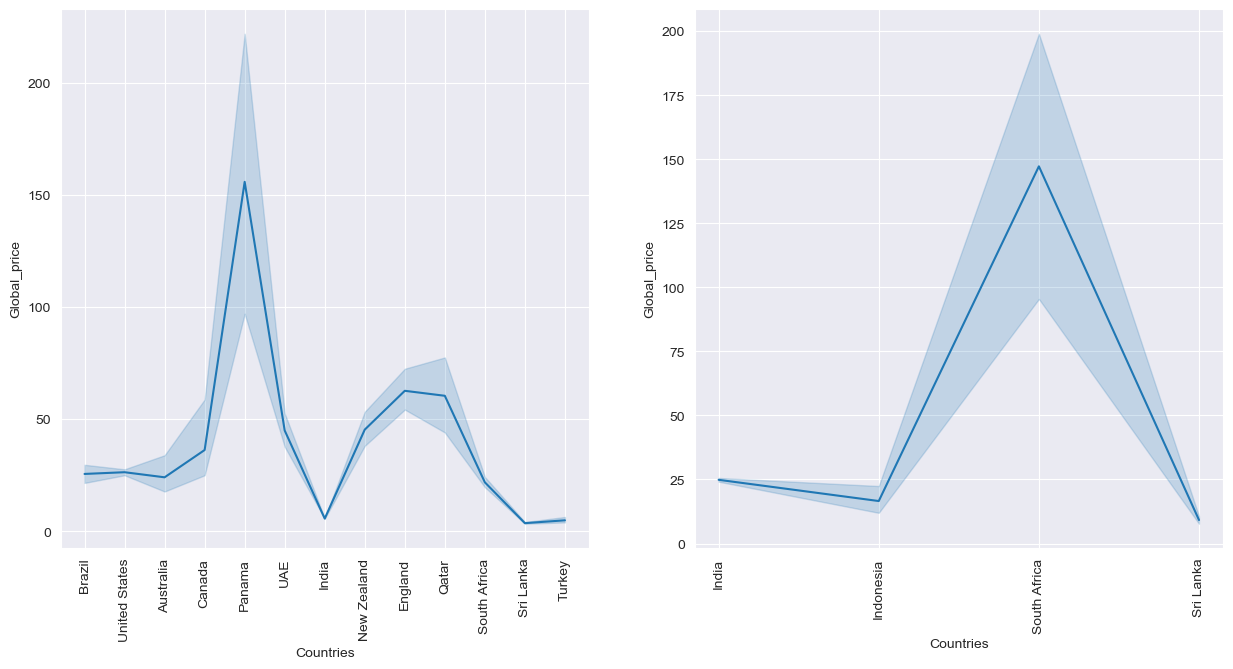

In [193]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.lineplot(data=Analysis, x = 'Countries',y = 'Global_price')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.lineplot(data=Price_Outlier, x = 'Countries', y = 'Global_price')
plt.xticks(rotation = 90)
plt.show()

***After converting the price to the global price, it shows in this distribution here shows that only in South Africa is the price truly an outlier whereas the high value in other Countries is due to the low exchange rate***

In [194]:
Price_Outlier[['Global_price', 'Average Cost for two','Currency']]

,Global_price,Average Cost for two,Currency
629,24.0,2000,Indian Rupees(Rs.)
630,30.0,2500,Indian Rupees(Rs.)
631,30.0,2500,Indian Rupees(Rs.)
633,43.2,3600,Indian Rupees(Rs.)
638,18.0,1500,Indian Rupees(Rs.)
...,...,...,...
9511,10.2,3000,Sri Lankan Rupee(LKR)
9512,15.3,4500,Sri Lankan Rupee(LKR)
9513,10.2,3000,Sri Lankan Rupee(LKR)
9514,13.6,4000,Sri Lankan Rupee(LKR)


In [195]:
Analysis = pd.concat([Analysis, Price_Outlier], axis = 0)

In [196]:
Analysis[['Global_price','Currency','Average Cost for two']]

,Global_price,Currency,Average Cost for two
22,10.45,Brazilian Real(R$),55
23,5.70,Brazilian Real(R$),30
24,8.55,Brazilian Real(R$),45
25,11.40,Brazilian Real(R$),60
26,9.50,Brazilian Real(R$),50
...,...,...,...
9511,10.20,Sri Lankan Rupee(LKR),3000
9512,15.30,Sri Lankan Rupee(LKR),4500
9513,10.20,Sri Lankan Rupee(LKR),3000
9514,13.60,Sri Lankan Rupee(LKR),4000


In [197]:
Analysis = Analysis.reset_index(drop = True)

In [198]:
Analysis['Country Code'].unique()


array([ 30, 216,  14,  37, 184, 214,   1, 148, 215, 166, 189, 191, 208,
        94], dtype=int64)

In [199]:
Analysis['Countries'].unique()

array(['Brazil', 'United States', 'Australia', 'Canada', 'Panama', 'UAE',
       'India', 'New Zealand', 'England', 'Qatar', 'South Africa',
       'Sri Lanka', 'Turkey', 'Indonesia'], dtype=object)

In [200]:
Analysis['Global_price']

0       10.45
1        5.70
2        8.55
3       11.40
4        9.50
        ...  
9515    10.20
9516    15.30
9517    10.20
9518    13.60
9519     6.80
Name: Global_price, Length: 9520, dtype: float64

In [201]:
Analysis['Global_price'] = np.round(Analysis['Global_price'])

In [202]:
type(Analysis['Global_price'].values)

numpy.ndarray

In [203]:
Analysis['Global_price']

0       10.0
1        6.0
2        9.0
3       11.0
4       10.0
        ... 
9515    10.0
9516    15.0
9517    10.0
9518    14.0
9519     7.0
Name: Global_price, Length: 9520, dtype: float64

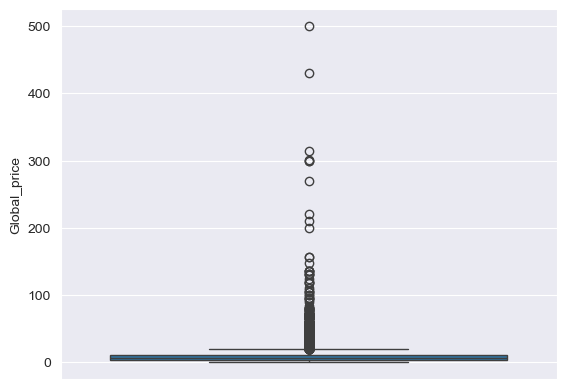

In [204]:
sns.boxplot(data = Analysis['Global_price'])
plt.show()

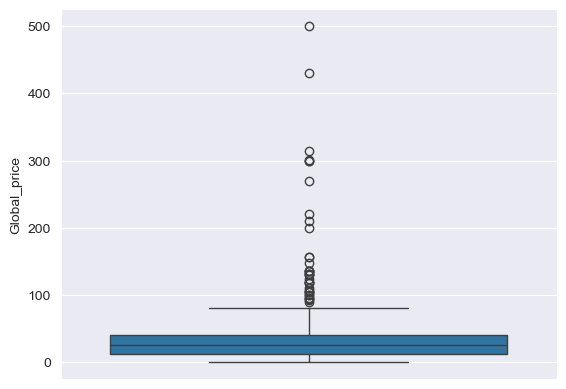

In [205]:
sns.boxplot(data = Analysis['Global_price'].drop(Analysis[Analysis['Countries']=='India'].index))
plt.show()

In [206]:
Currency = Analysis['Currency'].unique()

Here is the price distribution for Brazilian Real(R$) currency
count    60.000000
mean     25.583333
std      16.550172
min       6.000000
25%      13.000000
50%      19.000000
75%      33.500000
max      76.000000
Name: Global_price, dtype: float64
--------------------------------------------------
Here is the price distribution for Dollar($) currency
count    473.000000
mean      31.792812
std       42.160802
min        0.000000
25%       10.000000
50%       25.000000
75%       40.000000
max      500.000000
Name: Global_price, dtype: float64
--------------------------------------------------
Here is the price distribution for Emirati Diram(AED) currency
count     60.000000
mean      44.950000
std       29.683885
min       11.000000
25%       23.750000
50%       39.000000
75%       63.500000
max      135.000000
Name: Global_price, dtype: float64
--------------------------------------------------
Here is the price distribution for Indian Rupees(Rs.) currency
count    8652.000000
mean  

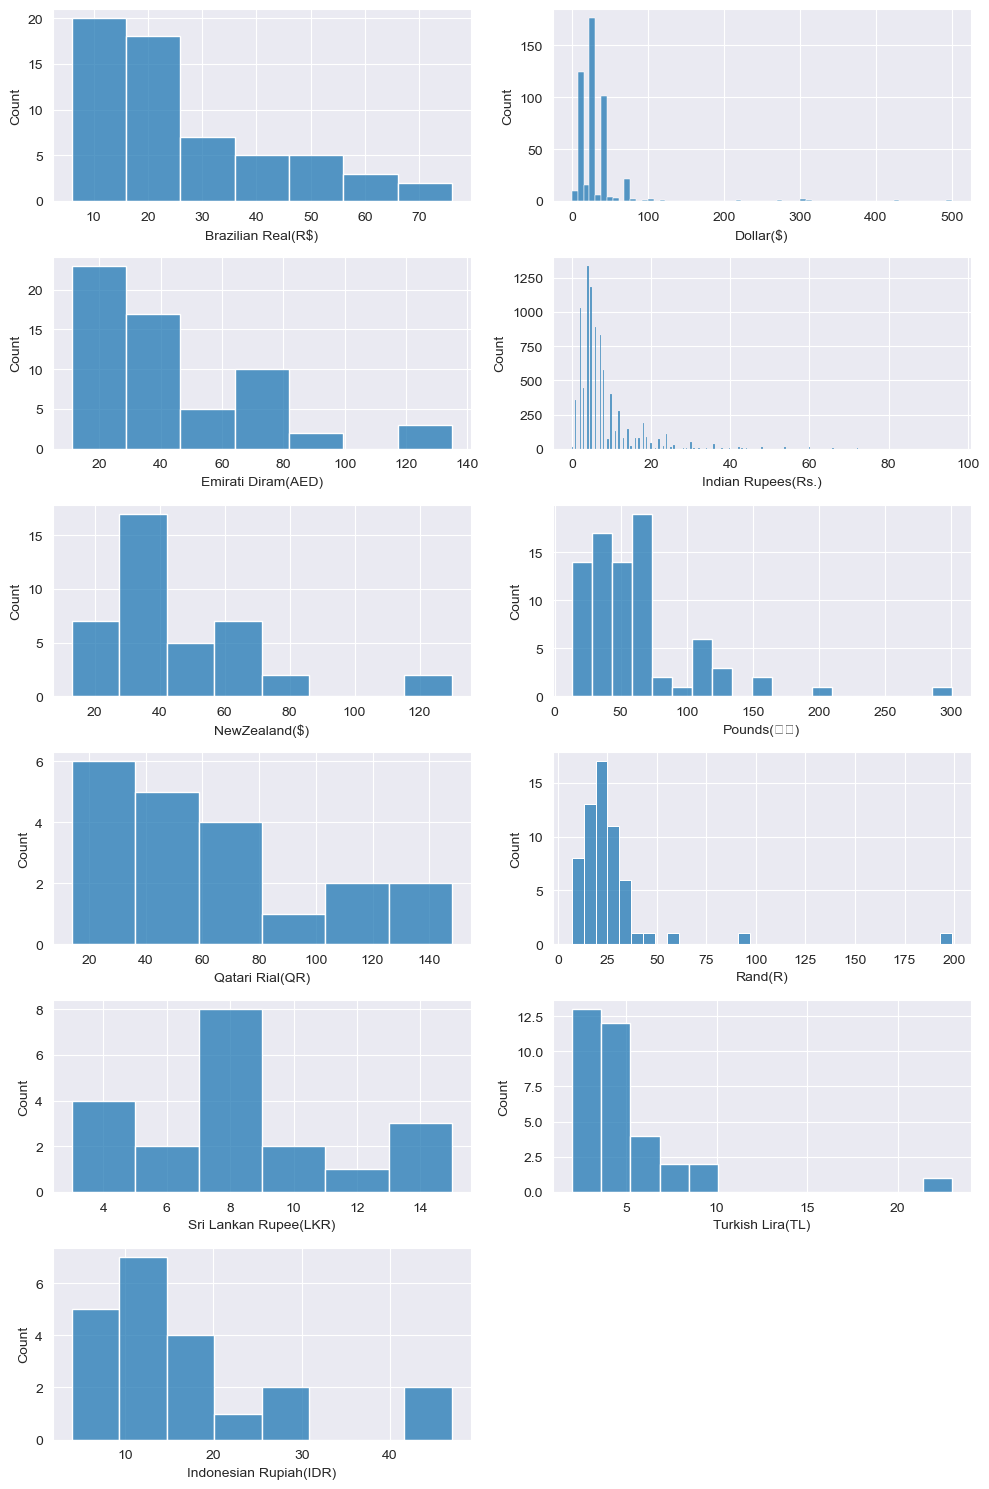

In [207]:
plt.figure(figsize = (10,15))
for i,value in enumerate(Currency):
    print(f'Here is the price distribution for {value} currency')
    print(Analysis[Analysis['Currency'] == value]['Global_price'].describe())
    print('-'* 50)
    plt.subplot(6,2,i+1)
    sns.histplot(x = Analysis[Analysis['Currency'] == value]['Global_price'])
    plt.xlabel(value)
plt.tight_layout()
plt.show()

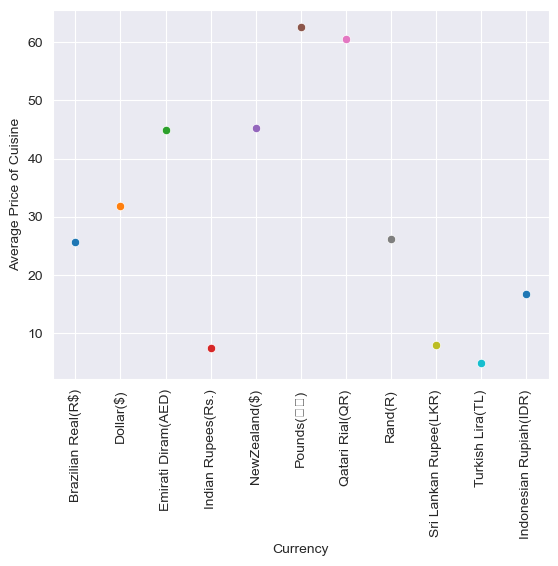

In [208]:
#Visualize the mean price for cuisine in each country
for i, value in enumerate(Currency):
    sns.scatterplot(x = Analysis[Analysis['Currency'] == value]['Currency'].head(1),y = Analysis[Analysis['Currency'] == value]['Global_price'].mean())
    plt.xticks(rotation = 90)
plt.ylabel('Average Price of Cuisine')
plt.show()

###### Global Price indepth analysis

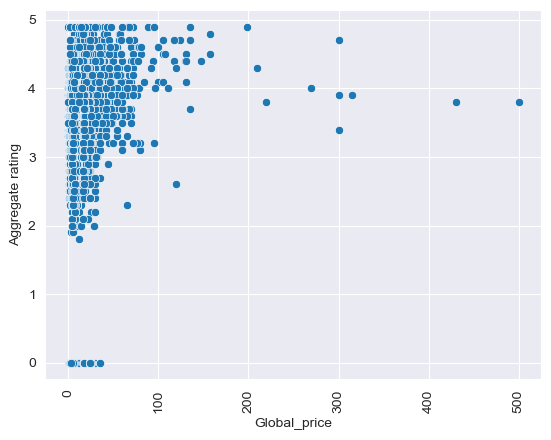

In [209]:

sns.scatterplot(x = Analysis['Global_price'],y = Analysis['Aggregate rating'])
plt.xticks(rotation = 90)
plt.ylabel('Aggregate rating')
plt.show()

In [210]:
Analysis['Global_price'].describe()

count    9520.000000
mean        9.897689
std        15.599099
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       500.000000
Name: Global_price, dtype: float64

In [211]:
#Check the average rating for the highest prices of cuisines
Analysis[Analysis['Global_price']>10]['Aggregate rating'].mean()

3.707383773928897

In [212]:
Analysis[Analysis['Global_price']>10]['Aggregate rating'].describe()

count    2194.000000
mean        3.707384
std         0.798757
min         0.000000
25%         3.500000
50%         3.800000
75%         4.200000
max         4.900000
Name: Aggregate rating, dtype: float64

In [213]:
Analysis['Aggregate rating'].describe()

count    9520.000000
mean        2.661071
std         1.515770
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

**It is seen that the cuisines that are more expensive tends to be more highly rated**

In [214]:
len(Analysis[Analysis['Global_price']>50]['Aggregate rating'])

166

In [215]:
Analysis[Analysis['Global_price']<50]['Aggregate rating'].mean()

2.634891432238742

In [216]:
Analysis[Analysis['Aggregate rating'] > 4.0]['Global_price'].describe()

count    1093.000000
mean       22.814273
std        24.322680
min         0.000000
25%        10.000000
50%        17.000000
75%        25.000000
max       301.000000
Name: Global_price, dtype: float64

In [217]:
Analysis[Analysis['Aggregate rating'] > 4.0]['Global_price'].value_counts().head(50)

Global_price
10.0     114
25.0      83
40.0      58
18.0      58
12.0      47
8.0       45
6.0       44
7.0       42
19.0      41
5.0       40
14.0      37
17.0      33
16.0      30
24.0      29
22.0      27
2.0       27
4.0       25
11.0      24
20.0      17
13.0      16
3.0       16
30.0      14
23.0      13
9.0       12
32.0      11
70.0      11
26.0      10
36.0       9
35.0       8
46.0       8
39.0       8
28.0       7
1.0        6
48.0       6
72.0       6
59.0       6
68.0       5
52.0       5
43.0       5
27.0       5
58.0       5
54.0       4
57.0       3
135.0      3
15.0       3
0.0        3
66.0       3
21.0       3
131.0      3
105.0      3
Name: count, dtype: int64

In [218]:
Coor = Analysis[['Global_price', 'Aggregate rating']].corr()

In [219]:
Coor

,Global_price,Aggregate rating
Global_price,1.00000,0.29071
Aggregate rating,0.29071,1.00000


#### Has Table Booking, Has Online delivery, Is delivering now EDA

In [220]:
Analysis[['Has Table booking' , 'Has Online delivery' , 'Is delivering now']].describe()

,Has Table booking,Has Online delivery,Is delivering now
count,9520,9520,9520
unique,2,2,2
top,No,No,No
freq,8376,7069,9486


In [221]:
list = ['Has Table booking' , 'Has Online delivery' , 'Is delivering now']
vals = Analysis[list[0]].unique()

Has Table booking
Has Online delivery
Is delivering now


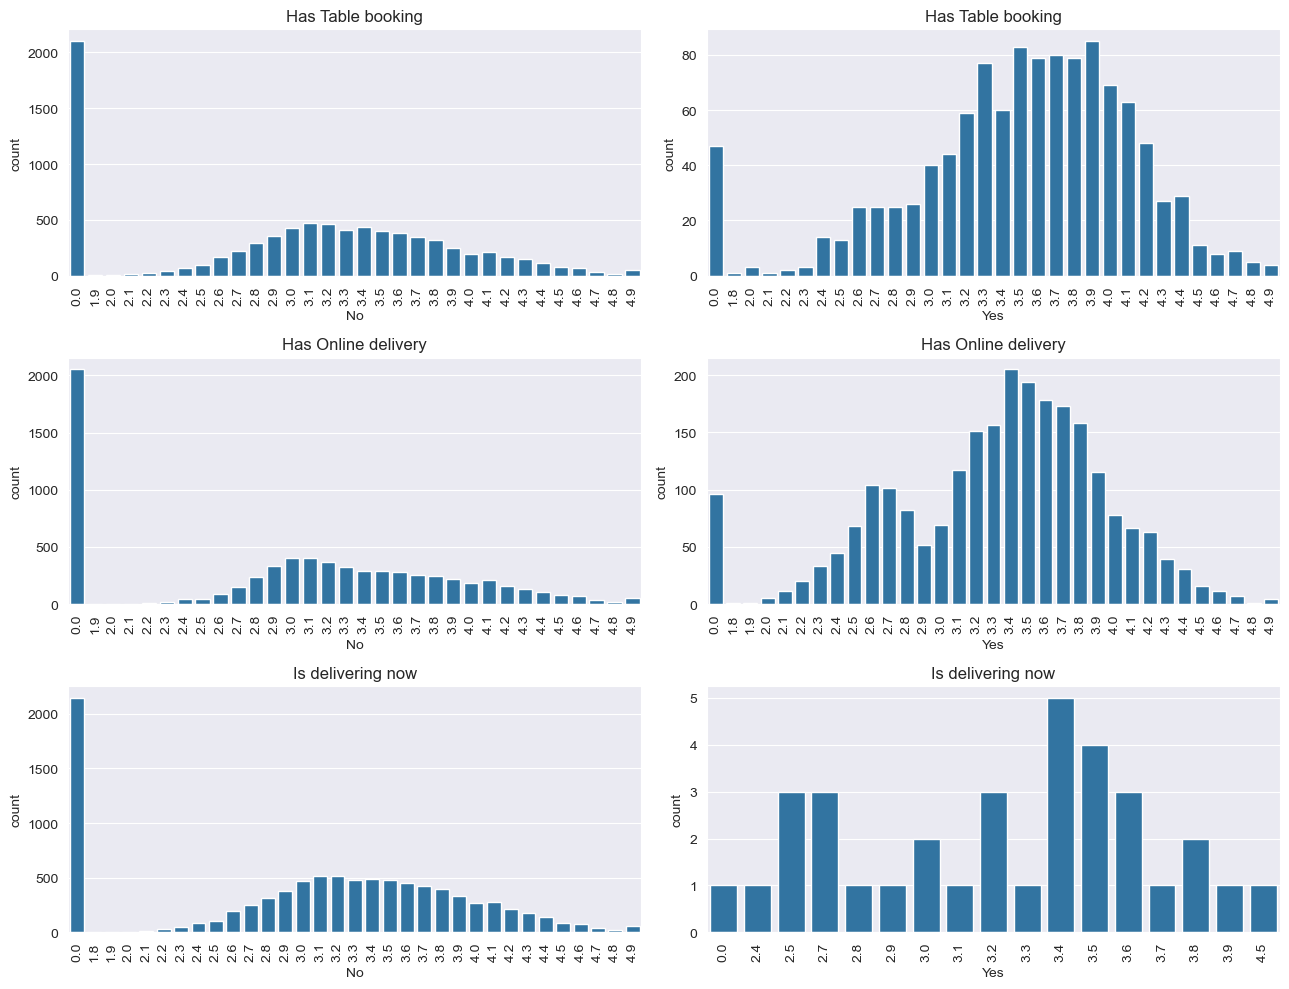

In [222]:
plt.figure(figsize = (13 , 10))
i = 1
for value in list:
    print(value)
    for val in vals:
        plt.subplot(3, 2, i)
        sns.countplot( x = Analysis[Analysis[value]== val]['Aggregate rating'] )
        plt.xlabel(val)
        plt.title(value)
        i += 1
        plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**This shows that for each of the highlighted Column above, if the optopn is yes it tends to increase the average rating of the cuisine**

In [223]:
Cor = pd.get_dummies(
    Analysis[['Has Table booking' , 'Has Online delivery' , 'Is delivering now', 'Aggregate rating']].
        drop(
            Analysis[Analysis['Aggregate rating'] == 0].index,
        )
).corr()

In [224]:
Cor

,Aggregate rating,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes
Aggregate rating,1.000000,-0.106169,0.106169,0.068747,-0.068747,0.022926,-0.022926
Has Table booking_No,-0.106169,1.000000,-1.000000,0.067489,-0.067489,-0.022328,0.022328
Has Table booking_Yes,0.106169,-1.000000,1.000000,-0.067489,0.067489,0.022328,-0.022328
Has Online delivery_No,0.068747,0.067489,-0.067489,1.000000,-1.000000,0.097874,-0.097874
Has Online delivery_Yes,-0.068747,-0.067489,0.067489,-1.000000,1.000000,-0.097874,0.097874
Is delivering now_No,0.022926,-0.022328,0.022328,0.097874,-0.097874,1.000000,-1.000000
Is delivering now_Yes,-0.022926,0.022328,-0.022328,-0.097874,0.097874,-1.000000,1.000000


#### Price Range EDA

In [225]:
Analysis['Price range'].unique()

array([2, 1, 3, 4], dtype=int64)

In [226]:
#Check for ratings accross different price points
Price_list =Analysis['Price range'].unique()
Price_list.sort()

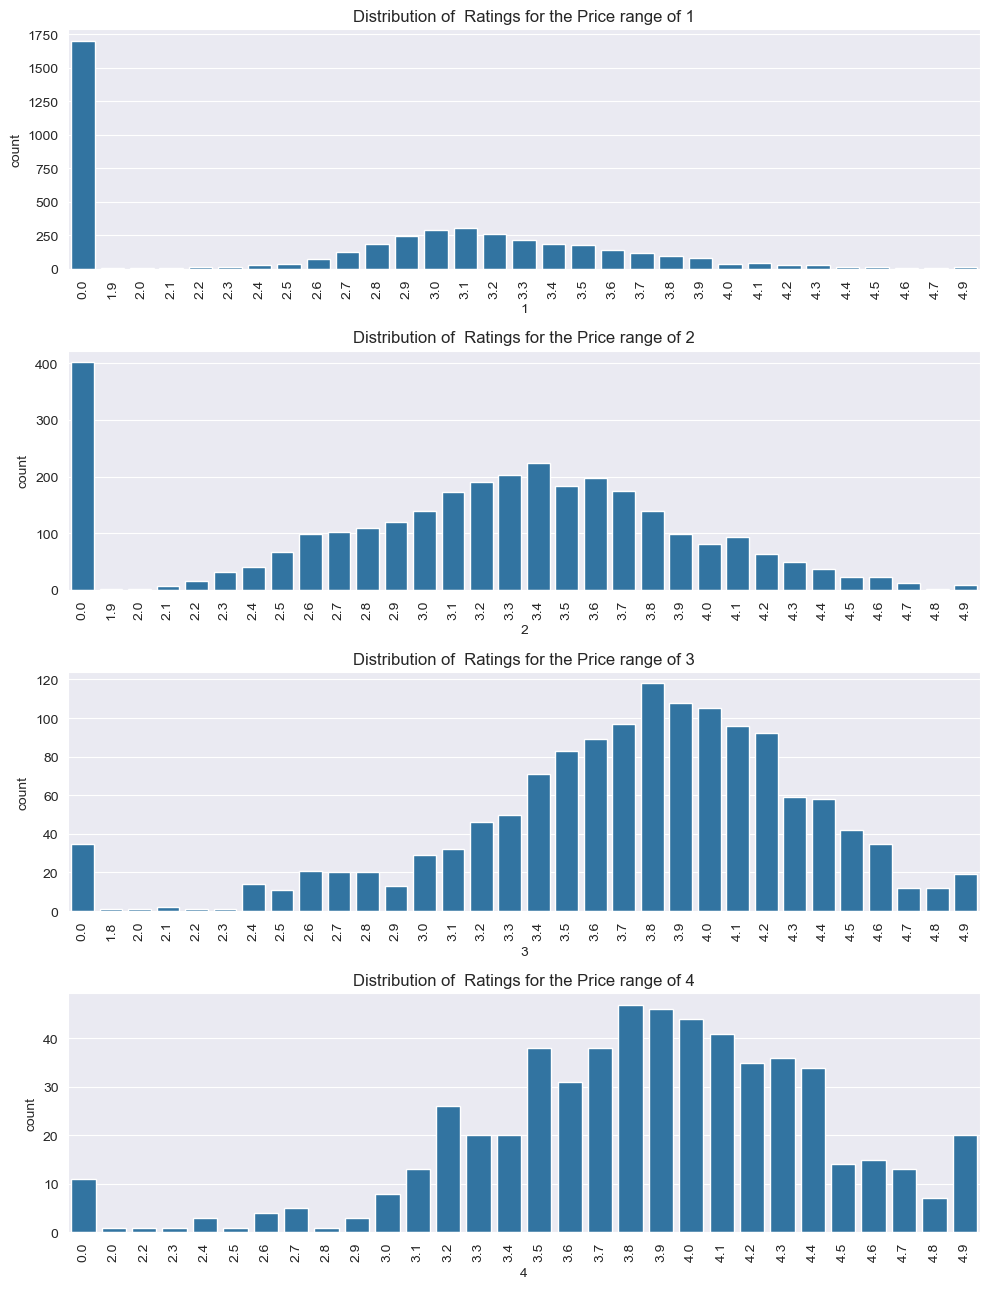

In [227]:
plt.figure(figsize = (10,13))
for i, value in enumerate(Price_list):
    plt.subplot( 4, 1, i+1)
    sns.countplot( x = Analysis[Analysis['Price range']== value]['Aggregate rating'] )
    plt.xlabel(value)
    plt.title(f'Distribution of  Ratings for the Price range of {value}')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**This visualization shows that there is a high positive correlation between price range and Aggregatae rating**

###### Price range and Global price

In [228]:
Analysis[Analysis['Price range'] == 1]['Global_price'].describe()

count    4438.000000
mean        3.627535
std         1.793442
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        20.000000
Name: Global_price, dtype: float64

In [229]:
Analysis[Analysis['Price range'] == 2]['Global_price'].describe()

count    3112.000000
mean        8.710476
std         5.094357
min         2.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        46.000000
Name: Global_price, dtype: float64

In [230]:
Analysis[Analysis['Price range'] == 3]['Global_price'].describe()

count    1393.000000
mean       18.673367
std        10.941668
min         3.000000
25%        12.000000
50%        16.000000
75%        19.000000
max        79.000000
Name: Global_price, dtype: float64

In [231]:
Analysis[Analysis['Price range'] == 4]['Global_price'].describe()

count    577.000000
mean      43.341421
std       44.156991
min        7.000000
25%       24.000000
50%       30.000000
75%       48.000000
max      500.000000
Name: Global_price, dtype: float64

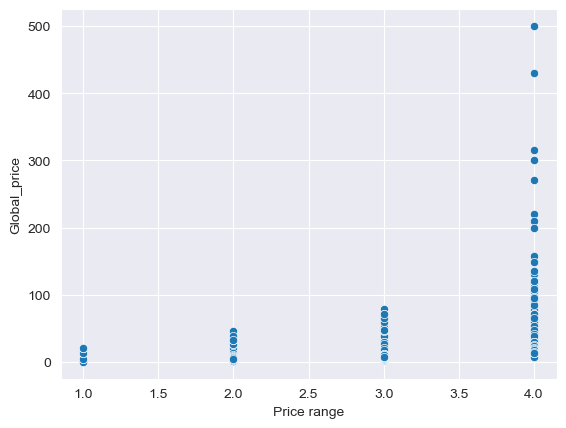

In [232]:
sns.scatterplot(data = Analysis, x = 'Price range', y = 'Global_price')
plt.show()

**As the case with Aggregate rating, Global price and Price range are both postively correlated**

In [233]:
#Top and most poplular cuisines for each price range

In [234]:
Correlation = Analysis[['Global_price' , 'Price range' , 'Aggregate rating']].corr()

In [235]:
Correlation

,Global_price,Price range,Aggregate rating
Global_price,1.00000,0.586480,0.290710
Price range,0.58648,1.000000,0.436013
Aggregate rating,0.29071,0.436013,1.000000


In [236]:
Analysis[(Analysis['Aggregate rating'] > 3.0) & (Analysis['Price range'] == 1)].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False).head(10)

Cuisines
BBQ, Breakfast, Southern         4.9
Italian, Deli                    4.9
Cafe, North Indian, Chinese      4.9
Mughlai, Lucknowi                4.9
Greek                            4.7
Desserts, Sandwich, Ice Cream    4.6
Italian                          4.6
Japanese                         4.6
Asian                            4.6
Mexican, Vegetarian              4.5
Name: Aggregate rating, dtype: float64

In [237]:
Analysis[(Analysis['Aggregate rating'] > 3.0) & (Analysis['Price range'] == 2)].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False).head(10)

Cuisines
Mexican, American, Healthy Food                           4.9
Sandwich, Seafood, Cajun                                  4.9
Taiwanese, Street Food                                    4.9
American, Coffee and Tea                                  4.9
American, Sandwich, Tea                                   4.9
Indian, North Indian, Curry, Cafe                         4.7
Desserts, Cafe, Mexican                                   4.7
Cafe, Continental, Italian, Mexican, Chinese, American    4.7
Desserts, B�_rek                                          4.7
Cajun                                                     4.7
Name: Aggregate rating, dtype: float64

In [238]:
Analysis[(Analysis['Aggregate rating'] > 3.0) & (Analysis['Price range'] == 3)].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False).head(10)

Cuisines
Desserts                               4.9
Sunda, Indonesian                      4.9
American, BBQ, Sandwich                4.9
World Cuisine                          4.9
Burger, Bar Food, Steak                4.9
European, German                       4.9
North Indian, South Indian, Mughlai    4.9
American, Burger, Grill                4.9
Continental, Indian                    4.9
American, Caribbean, Seafood           4.9
Name: Aggregate rating, dtype: float64

In [239]:
Analysis[(Analysis['Aggregate rating'] > 3.0) & (Analysis['Price range'] == 4)].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False).head(10)

Cuisines
Italian, Bakery, Continental            4.9
Tapas                                   4.9
Brazilian, Bar Food                     4.9
Bar Food                                4.9
European, Contemporary                  4.9
Hawaiian, Seafood                       4.9
Indian, North Indian                    4.9
North Indian, Chinese, Mediterranean    4.9
Contemporary, Italian                   4.8
Desserts, Cafe                          4.8
Name: Aggregate rating, dtype: float64

In [240]:
Countries = Analysis['Countries'].unique()

In [241]:
for value in Countries:
    print(f'For {value} the most popular cuisines are')
    print(Analysis[Analysis['Countries'] == value].groupby('Cuisines')['Votes'].mean().sort_values(ascending=False).head(10))
    print('-' * 50)


For Brazil the most popular cuisines are
Cuisines
French                            73.00
Gourmet Fast Food, Burger         68.00
Beverages, International          59.00
Brazilian, Bar Food, Beverages    58.00
Italian, Pizza                    49.00
Brazilian, Italian                46.00
BBQ, Grill, Brazilian             39.00
Brazilian, Bar Food               30.75
French, Brazilian, Beverages      30.00
Desserts, Cafe                    29.00
Name: Votes, dtype: float64
--------------------------------------------------
For United States the most popular cuisines are
Cuisines
American, Desserts, Steak           3157.0
Desserts, Bar Food                  3074.0
Brazilian, Steak                    2324.0
Burger, Bar Food, Steak             2238.0
Pub Food                            1998.0
Mexican, Vegetarian                 1868.0
American, Southern, Southwestern    1821.0
American, Seafood, Southern         1803.0
Cuban, Spanish                      1746.0
International, Italian, Sou

In [242]:
for Country in Countries:
    print(f'For {Country} the most popular cuisine by city is')
    print(
        Analysis[Analysis['Countries'] == Country].groupby(['City','Cuisines'])['Aggregate rating'].mean().sort_values(ascending=False)
        .head(10)
    )
    print('-' * 50)

For Brazil the most popular cuisine by city is
City            Cuisines                              
Rio de Janeiro  Desserts, Cafe                            4.800
S��o Paulo      Beverages, International                  4.800
Rio de Janeiro  Burger                                    4.800
                Juices, Healthy Food                      4.700
                Brazilian, Bar Food                       4.675
S��o Paulo      French, Brazilian, Beverages              4.600
Rio de Janeiro  Japanese                                  4.600
                Brazilian, Healthy Food, Juices, Pizza    4.600
S��o Paulo      Brazilian, Bar Food, Beverages            4.600
Bras�_lia       International                             4.550
Name: Aggregate rating, dtype: float64
--------------------------------------------------
For United States the most popular cuisine by city is
City            Cuisines                    
Rest of Hawaii  Japanese                        4.9
                H

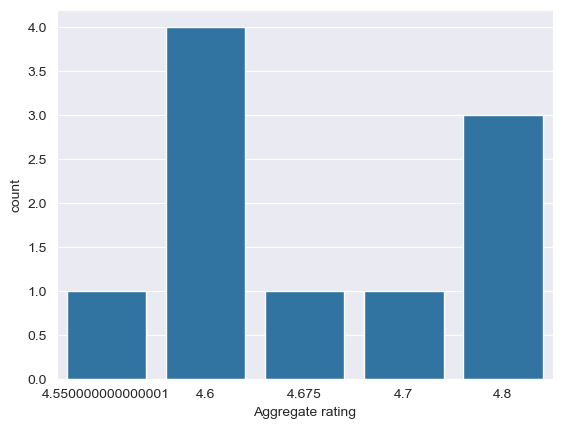

In [243]:
sns.countplot(
    x = Analysis[Analysis['Countries'] == 'Brazil']
            .groupby(['City','Cuisines'])['Aggregate rating']
                .mean().sort_values(ascending=False)
                    .head(10)
)
plt.show()

In [244]:
Analysis[Analysis['Countries'] == Country].groupby('Cuisines')['Votes'].mean().sort_values(ascending=False).head(10).index

Index(['Sunda, Indonesian', 'Italian, Continental',
       'Cafe, Italian, Coffee and Tea, Western, Indonesian',
       'Peranakan, Indonesian', 'Desserts, Bakery, Western',
       'Asian, Indonesian, Western', 'Japanese, Sushi, Ramen',
       'Cafe, Desserts, Beverages', 'Sushi, Japanese', 'Cafe, Western'],
      dtype='object', name='Cuisines')

In [245]:
Analysis[Analysis['Countries'] == Country].groupby('Cuisines')['Votes'].mean().sort_values(ascending=False).head(10)

Cuisines
Sunda, Indonesian                                     1838.0
Italian, Continental                                  1498.0
Cafe, Italian, Coffee and Tea, Western, Indonesian    1476.0
Peranakan, Indonesian                                 1159.0
Desserts, Bakery, Western                              903.0
Asian, Indonesian, Western                             873.0
Japanese, Sushi, Ramen                                 841.0
Cafe, Desserts, Beverages                              783.0
Sushi, Japanese                                        605.0
Cafe, Western                                          458.0
Name: Votes, dtype: float64

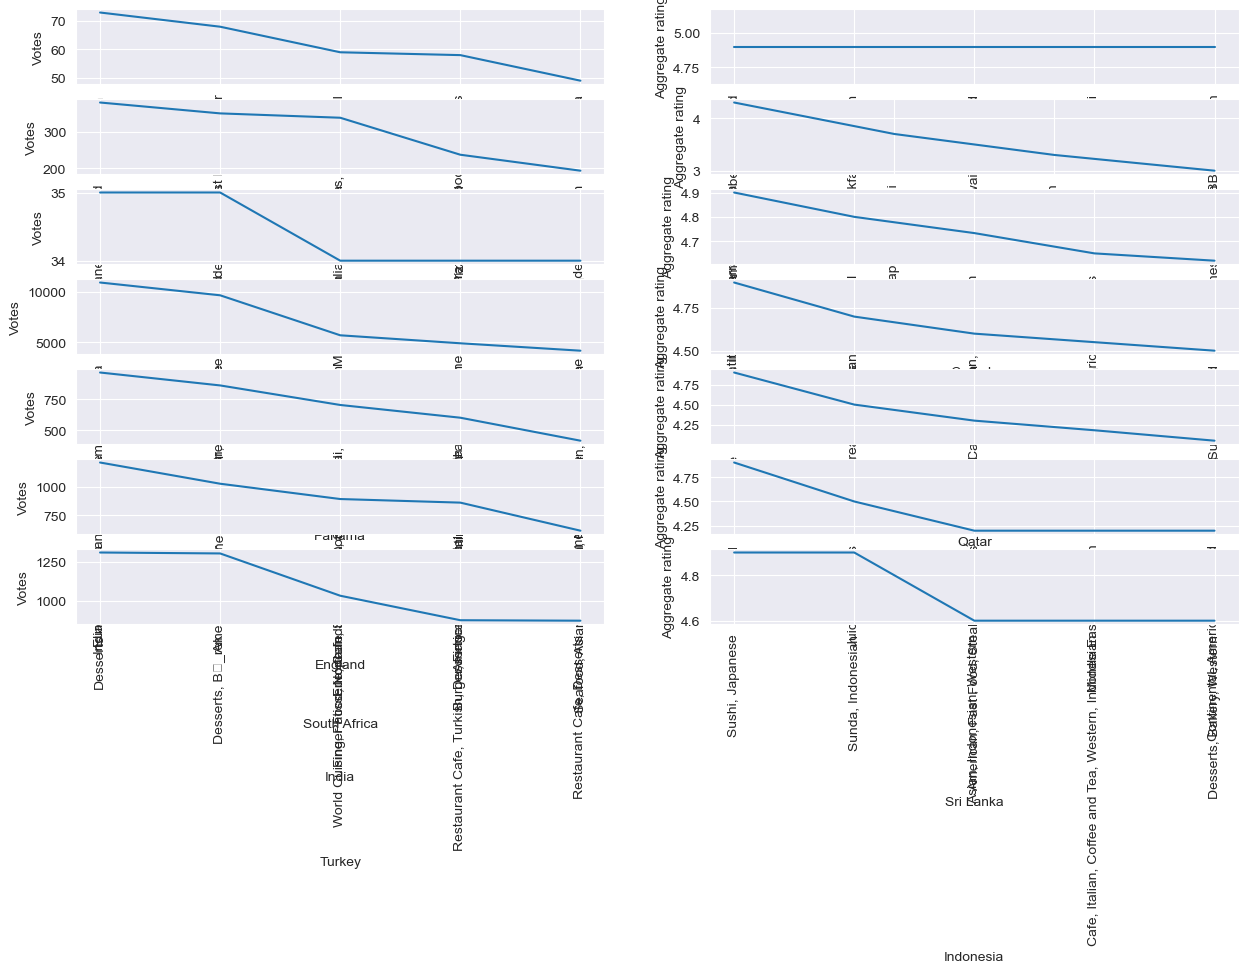

In [246]:
i = 2
index = 0
plt.figure(figsize=(15,15))
for Country in Countries:
    if (i % 2) == 0:
        plt.subplot(13,2,index + 1)
        sns.lineplot(
            x = 
                Analysis[Analysis['Countries'] == Country].groupby('Cuisines')['Votes'].mean().sort_values(ascending=False).head(5).index,
            y = 
                Analysis[Analysis['Countries'] == Country].groupby('Cuisines')['Votes'].mean().sort_values(ascending=False).head(5)
        )
        plt.xlabel(Country)
        plt.xticks(rotation = 90)
    elif(i%2) == 1:
        plt.subplot(13,2,index + 1)
        sns.lineplot(
            x = 
                Analysis[Analysis['Countries'] == Country].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(5).index,
            y = 
                Analysis[Analysis['Countries'] == Country].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(5)
        )
        plt.xlabel(Country)
        plt.xticks(rotation = 90)
    i +=1
    index+=1
plt.tight_layout()
plt.show()

In [247]:
Analysis['Votes']

0         6
1         9
2        11
3        11
4        11
       ... 
9515    171
9516    196
9517    286
9518    203
9519     58
Name: Votes, Length: 9520, dtype: int64

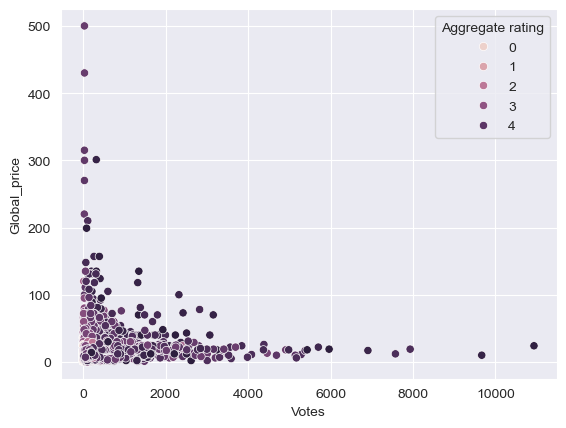

In [248]:
sns.scatterplot(data=Analysis, x = 'Votes' , y = 'Global_price', hue='Aggregate rating')
plt.show()

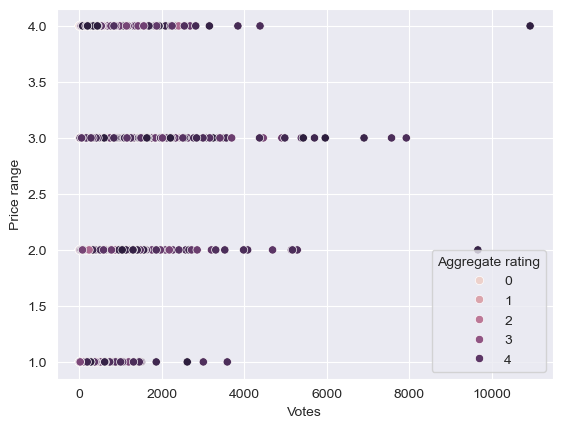

In [249]:
sns.scatterplot(data=Analysis, x = 'Votes' , y = 'Price range', hue='Aggregate rating')
plt.show()

In [250]:
Covid = Analysis[['Votes','Price range','Global_price','Aggregate rating']].corr()

In [251]:
Covid

,Votes,Price range,Global_price,Aggregate rating
Votes,1.000000,0.308349,0.185871,0.312521
Price range,0.308349,1.000000,0.586480,0.436013
Global_price,0.185871,0.586480,1.000000,0.290710
Aggregate rating,0.312521,0.436013,0.290710,1.000000


In [252]:
Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9520 non-null   object 
 1   Country Code          9520 non-null   int64  
 2   City                  9520 non-null   object 
 3   Longitude             9520 non-null   float64
 4   Latitude              9520 non-null   float64
 5   Cuisines              9520 non-null   object 
 6   Average Cost for two  9520 non-null   int64  
 7   Currency              9520 non-null   object 
 8   Has Table booking     9520 non-null   object 
 9   Has Online delivery   9520 non-null   object 
 10  Is delivering now     9520 non-null   object 
 11  Price range           9520 non-null   int64  
 12  Aggregate rating      9520 non-null   float64
 13  Rating color          9520 non-null   object 
 14  Rating text           9520 non-null   object 
 15  Votes                

In [253]:
#sns.pairplot(data = Analysis.select_dtypes(include=(np.number)))

In [254]:
#plt.show()

# Using Analysis to make business recommendation

In [255]:
Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9520 non-null   object 
 1   Country Code          9520 non-null   int64  
 2   City                  9520 non-null   object 
 3   Longitude             9520 non-null   float64
 4   Latitude              9520 non-null   float64
 5   Cuisines              9520 non-null   object 
 6   Average Cost for two  9520 non-null   int64  
 7   Currency              9520 non-null   object 
 8   Has Table booking     9520 non-null   object 
 9   Has Online delivery   9520 non-null   object 
 10  Is delivering now     9520 non-null   object 
 11  Price range           9520 non-null   int64  
 12  Aggregate rating      9520 non-null   float64
 13  Rating color          9520 non-null   object 
 14  Rating text           9520 non-null   object 
 15  Votes                

In [256]:
Analysis.drop(Analysis[Analysis['Aggregate rating'] == 0].index, axis= 0, inplace=True)

Here, from the trends noticed in the dataset, we'd try to help and make recommendations to optimise business inflow and outflow

`Most Popular Cusines by Country and Highest Rated Cuisines In those Countries`

In [257]:
Locations = Analysis['Countries'].unique()

In [258]:
Locations

array(['Brazil', 'United States', 'Australia', 'Canada', 'Panama', 'UAE',
       'India', 'New Zealand', 'England', 'Qatar', 'South Africa',
       'Sri Lanka', 'Turkey', 'Indonesia'], dtype=object)

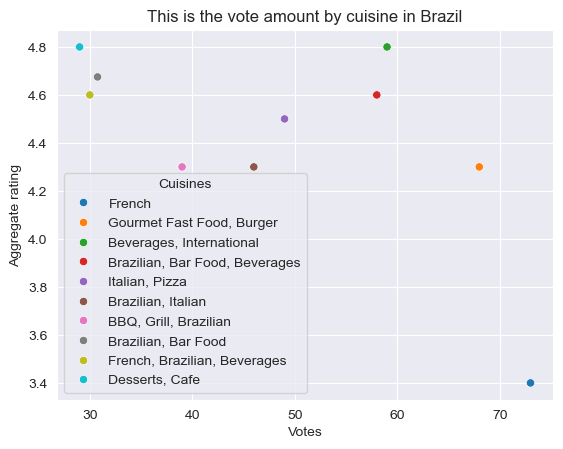

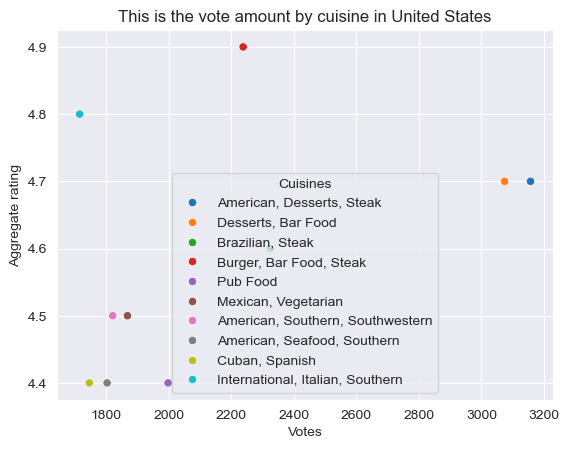

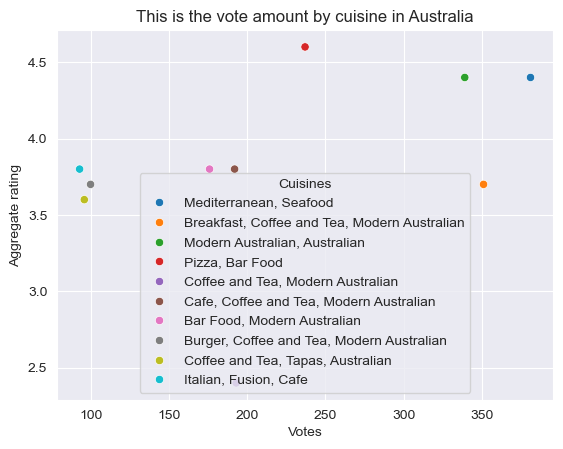

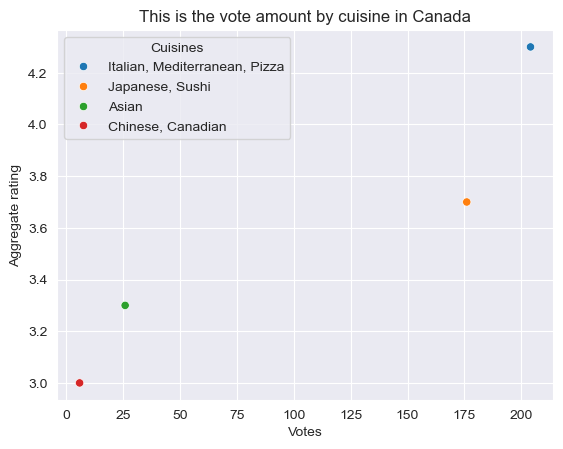

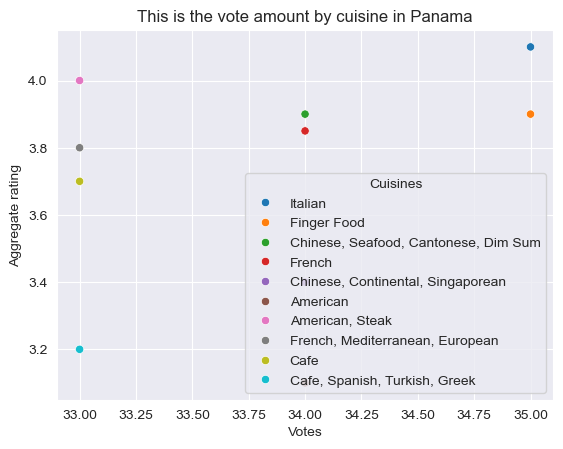

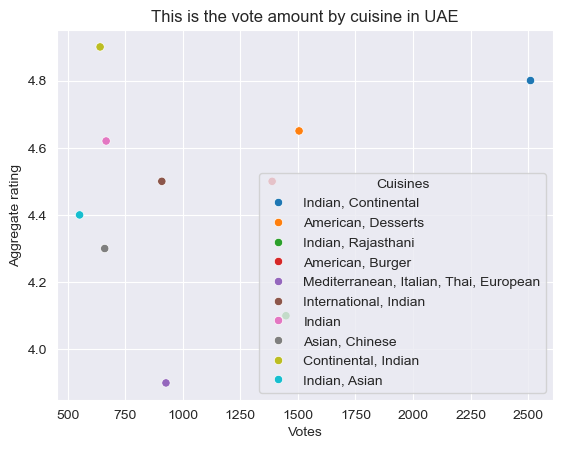

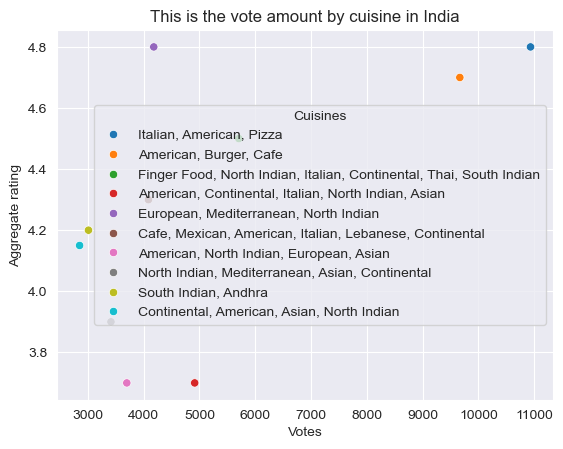

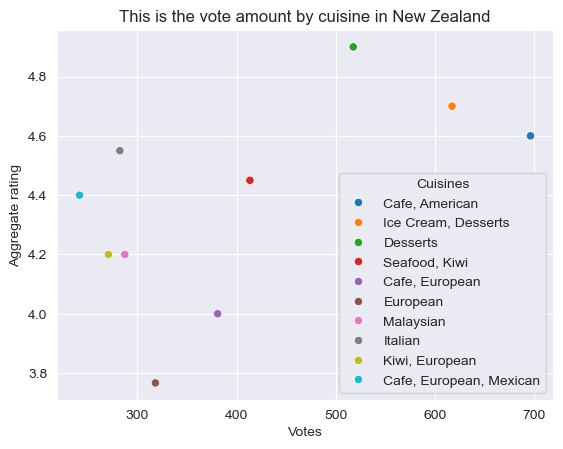

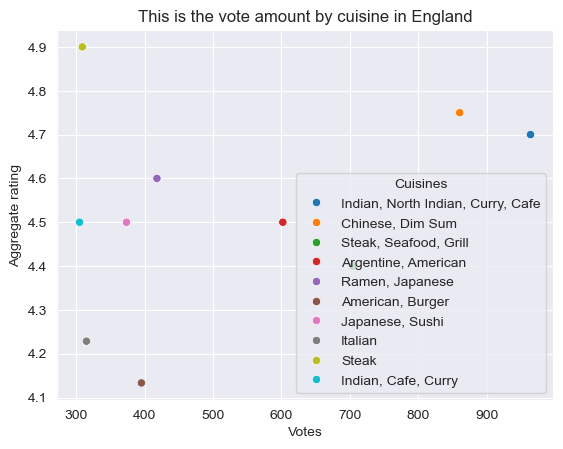

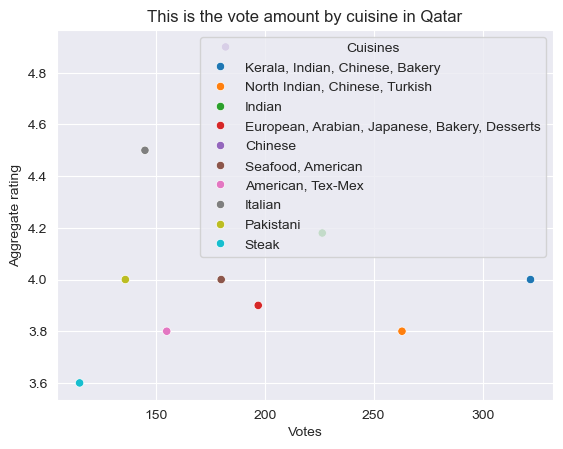

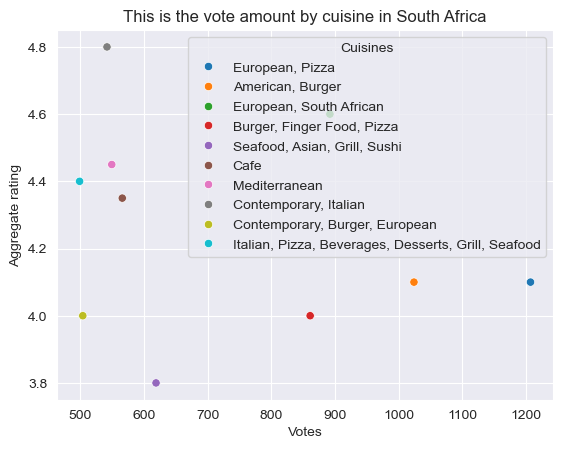

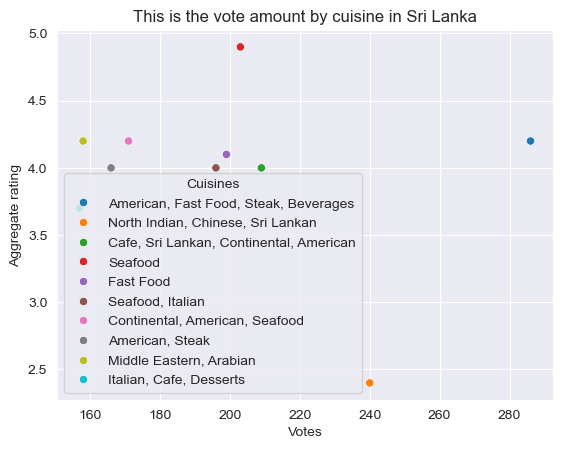

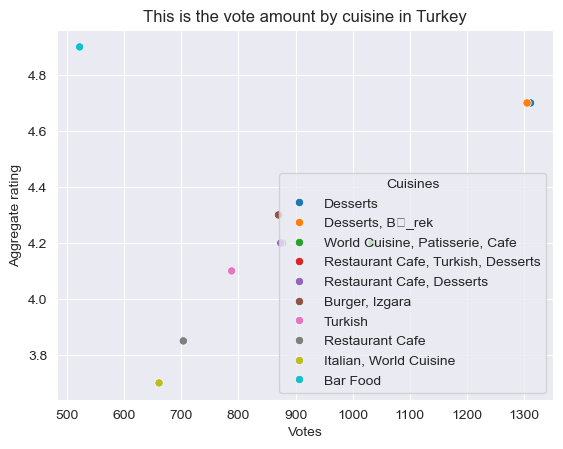

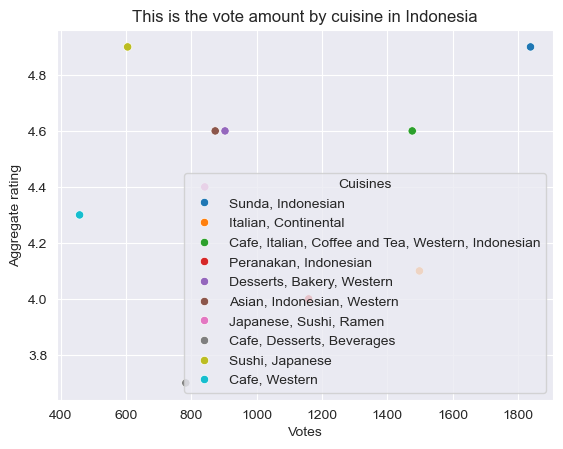

In [259]:
for location in Locations:
    sns.scatterplot(data = Analysis[Analysis['Countries'] == location].groupby(['Countries','Cuisines'])[['Votes','Aggregate rating']].mean().sort_values(by = ['Votes', 'Aggregate rating'], ascending = False).head(10) ,
                    x = 'Votes', y ='Aggregate rating', hue = 'Cuisines')
    plt.title(f'This is the vote amount by cuisine in {location}')
    plt.show()

***CUISINE RECOMMENDATION FOR EACH COUNTRY:***
+ **Brazil** : If you are looking to open  a restaurant in Brazil, the most popular cuisines in there are `French` ,`Native(Brazillian)`, `Italian`, `Bar Foods`, `International(Cuisines from other countries)` these cuisines are sure to make a big and almost instant hit in Brazil, therefore they are recommended. Although almost all these are very competetive due to high rating of their foods, The **French** cuisine has the ,Most potential to be a big hit because despite it's low rating compared to other popular cuisines, it is the most popular, so a well prepared French meal in Brazil is highly to succeed
+ **United States Of America** : If you are looking to open  a restaurant in Brazil, the most popular cuisines in there are `Native(American)` ,`Steaks`, `Italian`, `Bar Foods`, `International(Cuisines from other countries)` these cuisines are sure to make a big and almost instant hit in the United States, therefore they are recommended. All Cuisines here are top rated therefore there may be competition for each cuisine
+ **Australia** : Australia's restaurant situation is a unique one where the locals although have their preferred dishes(`Modern Australian Cuisine` , `Coffee and Tea`) are dissatisfied with the service of the aforementioned cuisines delivered to them, this is revealed in the table that restaurants these dishes have a very low rating compared to the other popular cuisines e.g : `Australian`, `Bar Foods` , ` Mediterranean`
+ **Canada** : Canada isn't represented well in this dataset and the vote count here is just 400+.... Out of this Vote count, almost 50% have tried the restaurant that has `Italian`, `Mediterrenean`, `Pizza` Cuisines and they were majorly satisfied with the service offered to them.
+ **Panama** : Just like Canada, Panama isn't well represented in this dataset and therefore doesnt have a lot of vote count. `Italian`, `American and American Steak`, `Chinese`, `French` Cuisines are quite popular, the ratings for the restaurants serving these cuisines are good but can be better, so a restaurant offering top quality services for the aforementioned cuisines would be sure to have high rating and high amount of customers
+ **UAE** : UAE locals tend to prefer their continental cuisines, hence the reason why their most popular cuisines are mostly `Asian`.
+ **India** : India is the most represented country in this dataset. The most preferred cuisines in this country is mostly their native ones from different regions (`North Indian`, `South Indian`), the `American` and `Italian` cuisines. The rating for the restaurants offering these cuisines is pretty high so there might be competiton in trying to offer the same services
+ **New Zealand** : in New Zealand, `American` , `Desserts(probably their local dessert)` , `European` , `Cafe(local)` , `Italian` and `Malaysian` are the most popular cuisines, the customers are generally pleased with these cuisines too(although sightly less so in the case of restaurants offering only `European Cuisines`) so competiton may be faced in trying to establish a restauirant with these cuisines.
+  **England** : The quality of restaurants in England is fairly good and the most popular cuisines in this country are `Indian` , `Chinese` , `Steaks(Local)` , `American` , `Japanese` cuisines. The `Steaks` being served in UK are of high quality as restaurants that serves steaks have a high rating and the ones that serve only steak have a rating as high as 4.90
+  **Qatar** : In Qatar, `Indian` , `Chinese` , `Italian` , `American` Cuisines are the most popular where the `Chinese` cuisine has the highest rating index and has a rating 4.9 when it is served alone
+  **South Africa** : In South Africa the most popular cuisines are: `Burgers` , `American` , `European` , `Cotemporary` , `Pizza` , `Italian`.. While `Italian` Cuisines may not be the most popular of the lot, but they seem to be well liked by the relatively few people that tries it.
+  **Sri Lanka** : In Sri Lanka, `American` , `Steak` , `Fast Food` , `Beverages` and `Sea food` Cusines are the most popular with the quality of seafoods being nigh perfect... `North Indian` and `Chinese` while being fairly popular are poorly served there in terms of quality as reflected by the ratings given to the restaurants offering them.
+  **Turkey** : Turkey represents a fair amount of data in the dataset, most popular Cuisines are , `Desserts(Highly Popular in Turkey)` , `Restaurant Cafe` , `Native(Turkish)` Cuisines. Dessert and Bar Food are the Cuisines that gives customers the most satisfaction with 4.7 and 4.9 rating when they are offered as stand alone cuisines
+  **Indonesia** : In Indonesia, the most popular dish is their native dish `Indonesian` it is also the cuisine that is most rated. the other popular cuisines are `Sushi` , `Japanese` , `Western` , `Italian`.

***Inisghts from this***
1. Restaurants that serves just one cuisines are more likely to get higher rating than multiple cuisines, finding a very popular cuisine in a region and serving it as a stand-alone Cuiasine is most likely to yield both Votes and high rating
2. `Italian`, `American` Cuisines are a world favourite(or at least in this data set) 

In [260]:
print(Analysis[Analysis['Has Online delivery']  == 'Yes']['Aggregate rating'].mean())
print(Analysis[Analysis['Has Online delivery']  == 'Yes']['Votes'].mean())

3.381273885350318
219.85817409766454


In [261]:
print(Analysis[Analysis['Has Online delivery']  == 'No']['Aggregate rating'].mean())
print(Analysis[Analysis['Has Online delivery']  == 'No']['Votes'].mean())

3.462328084512657
192.8086505880008


__Online Delivery doesn't really affect either votes or Aggregate rating, Online delivery increases vote count a bit but it reduces rating too by a bit, probably due to bad service being rendered online__

In [262]:
print(Analysis[Analysis['Has Table booking']  == 'Yes']['Aggregate rating'].mean())
print(Analysis[Analysis['Has Table booking']  == 'Yes']['Votes'].mean())

3.5760255241567913
366.81494986326345


In [263]:
print(Analysis[Analysis['Has Table booking']  == 'No']['Aggregate rating'].mean())
print(Analysis[Analysis['Has Table booking']  == 'No']['Votes'].mean())

3.41203187250996
172.5403984063745


__When a restaurant has table booking, it increases the amount of customers they get as evident in the statistic above__

In [264]:
print(Analysis[Analysis['Is delivering now']  == 'Yes']['Aggregate rating'].mean())
print(Analysis[Analysis['Is delivering now']  == 'Yes']['Votes'].mean())

3.2484848484848485
153.27272727272728


In [265]:
print(Analysis[Analysis['Is delivering now']  == 'No']['Aggregate rating'].mean())
print(Analysis[Analysis['Is delivering now']  == 'No']['Votes'].mean())

3.4372802834173593
201.6663033110778


In [266]:
Analysis[(Analysis['Has Online delivery']  == 'Yes') & (Analysis['Has Table booking']  == 'Yes') ]['Aggregate rating'].mean()

3.612471131639723

In [267]:
print(Analysis[(Analysis['Has Online delivery']  == 'Yes') & (Analysis['Has Table booking']  == 'Yes') & (Analysis['Is delivering now']  == 'Yes') ]['Aggregate rating'].mean())
print(Analysis[(Analysis['Has Online delivery']  == 'Yes') & (Analysis['Has Table booking']  == 'Yes') & (Analysis['Is delivering now']  == 'Yes') ]['Votes'].mean())

3.0
70.0


In [268]:
Analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7372 entries, 0 to 9519
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       7372 non-null   object 
 1   Country Code          7372 non-null   int64  
 2   City                  7372 non-null   object 
 3   Longitude             7372 non-null   float64
 4   Latitude              7372 non-null   float64
 5   Cuisines              7372 non-null   object 
 6   Average Cost for two  7372 non-null   int64  
 7   Currency              7372 non-null   object 
 8   Has Table booking     7372 non-null   object 
 9   Has Online delivery   7372 non-null   object 
 10  Is delivering now     7372 non-null   object 
 11  Price range           7372 non-null   int64  
 12  Aggregate rating      7372 non-null   float64
 13  Rating color          7372 non-null   object 
 14  Rating text           7372 non-null   object 
 15  Votes                 7372

# Data Preprocessing for Linear Regression

##### Data Standardization

In [269]:
Analysis.select_dtypes(include=np.number).corr()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Global_price,Restaurant ID
Country Code,1.000000,-0.748792,0.015403,0.040054,0.205461,0.405702,0.125818,0.459055,0.057735
Longitude,-0.748792,1.000000,-0.092635,0.049482,-0.082924,-0.299970,-0.086795,-0.231743,-0.039804
Latitude,0.015403,-0.092635,1.000000,-0.125113,-0.218030,-0.175793,-0.036936,-0.090172,-0.121247
Average Cost for two,0.040054,0.049482,-0.125113,1.000000,0.070815,0.077286,0.063474,0.043494,0.074506
Price range,0.205461,-0.082924,-0.218030,0.070815,1.000000,0.399160,0.273203,0.566376,-0.177143
Aggregate rating,0.405702,-0.299970,-0.175793,0.077286,0.399160,1.000000,0.408544,0.328337,0.203413
Votes,0.125818,-0.086795,-0.036936,0.063474,0.273203,0.408544,1.000000,0.153721,-0.168139
Global_price,0.459055,-0.231743,-0.090172,0.043494,0.566376,0.328337,0.153721,1.000000,-0.161926
Restaurant ID,0.057735,-0.039804,-0.121247,0.074506,-0.177143,0.203413,-0.168139,-0.161926,1.000000


In [270]:
Analysis.select_dtypes(include=(np.number)).describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Global_price,Restaurant ID
count,7372.000000,7372.000000,7372.000000,7372.000000,7372.000000,7372.000000,7372.000000,7372.000000,8.260000e+02
mean,22.619371,63.482347,26.210611,1449.690315,1.966359,3.436435,201.449674,11.572029,5.537521e+06
std,62.742237,44.335554,11.269397,18341.777885,0.928283,0.549771,479.721980,17.296966,7.974018e+06
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,1.800000,4.000000,0.000000,5.300000e+01
25%,1.000000,77.082438,28.475820,300.000000,1.000000,3.000000,18.000000,5.000000,5.034500e+03
50%,1.000000,77.191650,28.570123,500.000000,2.000000,3.400000,59.000000,7.000000,3.070505e+05
75%,1.000000,77.269158,28.645266,800.000000,3.000000,3.800000,179.000000,12.000000,1.812890e+07
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000,500.000000,1.847265e+07


In [271]:
Analysis.select_dtypes(include=(object)).describe()

,Restaurant Name,City,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text,Countries,Address,Locality,Locality Verbose,Switch to order menu
count,7372,7372,7372,7372,7372,7372,7372,7372,7372,7372,826,826,826,826
unique,5682,131,1703,11,2,2,2,5,5,14,710,350,354,1
top,Domino's Pizza,New Delhi,North Indian,Indian Rupees(Rs.),No,No,No,Orange,Average,India,"The Imperial, Janpath, New Delhi",Connaught Place,"Connaught Place, New Delhi",No
freq,74,4048,492,6513,6275,5017,7339,3734,3734,6513,8,48,48,826


In [272]:
data_preprocessing = Analysis.copy()

In [273]:
data_preprocessing

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Countries,Global_price,Restaurant ID,Address,Locality,Locality Verbose,Switch to order menu
0,Chez Michou,30,Bras�_lia,-47.881789,-15.764142,"Fast Food, French",55,Brazilian Real(R$),No,No,No,2,3.0,Orange,Average,6,Brazil,10.0,NaN,NaN,NaN,NaN,NaN
1,Caf�� Daniel Briand,30,Bras�_lia,-47.882667,-15.777500,Cafe,30,Brazilian Real(R$),No,No,No,1,3.8,Yellow,Good,9,Brazil,6.0,NaN,NaN,NaN,NaN,NaN
2,Casa do Biscoito Mineiro,30,Bras�_lia,-47.882136,-15.757472,Bakery,45,Brazilian Real(R$),No,No,No,2,3.7,Yellow,Good,11,Brazil,9.0,NaN,NaN,NaN,NaN,NaN
3,Maori,30,Bras�_lia,-47.888167,-15.758833,Brazilian,60,Brazilian Real(R$),No,No,No,3,3.8,Yellow,Good,11,Brazil,11.0,NaN,NaN,NaN,NaN,NaN
4,Pizza �� Bessa,30,Bras�_lia,-47.915667,-15.831167,Pizza,50,Brazilian Real(R$),No,No,No,2,3.2,Orange,Average,11,Brazil,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Cricket Club Cafe,191,Colombo,0.000000,0.000000,"Continental, American, Seafood",3000,Sri Lankan Rupee(LKR),No,No,No,3,4.2,Green,Very Good,171,Sri Lanka,10.0,5800316.0,"12 Flower Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",No
9516,The Manhattan Fish Market,191,Colombo,79.853364,6.906814,"Seafood, Italian",4500,Sri Lankan Rupee(LKR),No,No,No,4,4.0,Green,Very Good,196,Sri Lanka,15.0,5800710.0,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",No
9517,The Sizzle,191,Colombo,79.852928,6.904581,"American, Fast Food, Steak, Beverages",3000,Sri Lankan Rupee(LKR),No,No,No,3,4.2,Green,Very Good,286,Sri Lanka,10.0,5800433.0,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",No
9518,Ministry of Crab,191,Colombo,79.844239,6.932814,Seafood,4000,Sri Lankan Rupee(LKR),No,No,No,4,4.9,Dark Green,Excellent,203,Sri Lanka,14.0,5800176.0,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",No


In [274]:
stats.skew(data_preprocessing['Global_price'])

10.365033616837666

In [275]:
Numerical_Columns = data_preprocessing.select_dtypes(include=(np.number)).columns

In [276]:
Skewed = []
Highly_Skewed = []
Non_Skewed =[]
for Column in Numerical_Columns:
    if (abs(stats.skew(data_preprocessing[Column])) > 10):
        Highly_Skewed.append({Column: stats.skew(data_preprocessing[Column]) })
    elif(abs(stats.skew(data_preprocessing[Column])) > 1):
        Skewed.append({Column:stats.skew(data_preprocessing[Column])})
    else:
        Non_Skewed.append({Column:stats.skew(data_preprocessing[Column])})

In [277]:
print(Highly_Skewed)
print(Skewed)
print(Non_Skewed)

[{'Average Cost for two': 31.165193264167133}, {'Global_price': 10.365033616837666}]
[{'Country Code': 2.6295586486942417}, {'Longitude': -2.738417489275971}, {'Latitude': -3.3023454245298742}, {'Votes': 7.954144224030151}]
[{'Price range': 0.6427198075148313}, {'Aggregate rating': 0.2265632990270885}, {'Restaurant ID': nan}]


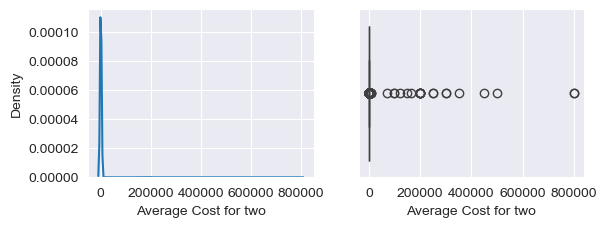

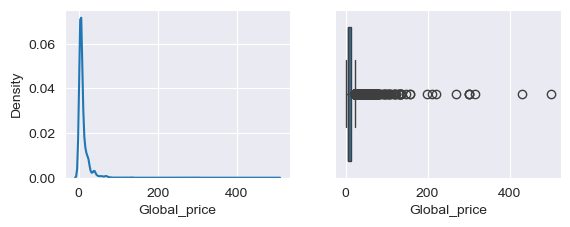

In [278]:
i = 1
for val in Highly_Skewed:
    for key, value in val.items():
        plt.subplot(2,2,i)
        sns.kdeplot(Analysis[key])
        plt.subplot(2,2,i+1)
        sns.boxplot(x = Analysis[key])
        plt.show()
    i +=2
plt.tight_layout()

In [279]:
data_preprocessing[data_preprocessing['Average Cost for two'] == 0]['Average Cost for two'].value_counts()

Average Cost for two
0    15
Name: count, dtype: int64

In [280]:
data_preprocessing.drop(data_preprocessing[data_preprocessing['Global_price'] == 0].index, inplace = True)

In [281]:
data_preprocessing[data_preprocessing['Global_price'] == 0]['Global_price'].value_counts()

Series([], Name: count, dtype: int64)

In [282]:
data_preprocessing[data_preprocessing['Global_price'] == 0]['Average Cost for two'].value_counts()

Series([], Name: count, dtype: int64)

In [283]:
Robust = RobustScaler()

In [284]:
data_preprocessing['Average Cost for two'] = Robust.fit_transform(np.log(data_preprocessing[['Average Cost for two']] + 1))

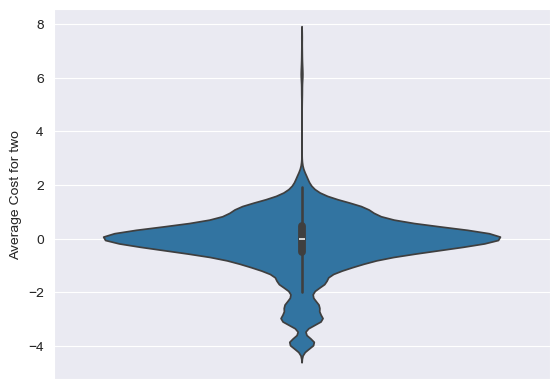

In [285]:
sns.violinplot(data_preprocessing['Average Cost for two'])
plt.show()

In [286]:
data_preprocessing['Average Cost for two']

0      -2.238828
1      -2.843031
2      -2.439809
3      -2.151449
4      -2.334385
          ...   
9515    1.828959
9516    2.243113
9517    1.828959
9518    2.122802
9519    1.414861
Name: Average Cost for two, Length: 7357, dtype: float64

In [287]:
data_preprocessing[data_preprocessing['Average Cost for two'] > 1]['Average Cost for two'].describe()

count    834.000000
mean       1.511165
std        0.841472
min        1.013531
25%        1.121103
50%        1.307270
75%        1.601056
max        7.535895
Name: Average Cost for two, dtype: float64

In [288]:
data_preprocessing[data_preprocessing['Average Cost for two'] > 2]['Average Cost for two'].describe()

count    81.000000
mean      3.301602
std       1.797134
min       2.015182
25%       2.172639
50%       2.350739
75%       5.046902
max       7.535895
Name: Average Cost for two, dtype: float64

In [289]:
data_preprocessing['Average Cost for two'].describe()

count    7357.000000
mean       -0.166906
std         1.164197
min        -4.226985
25%        -0.520557
50%         0.000000
75%         0.479443
max         7.535895
Name: Average Cost for two, dtype: float64

In [290]:
Q1,Q3 = np.percentile((data_preprocessing['Average Cost for two'].sort_values()), [25,75])
IQR = Q3-Q1
lower_limit = (Q1 - 1.5 *IQR)
upper_limit = (Q3 + 1.5 * IQR)

In [291]:
print(f'lower limit is {lower_limit} and the upper limit is {upper_limit}')

lower limit is -2.020557324290763 and the upper limit is 1.9794426757092372


In [292]:
data_preprocessing[data_preprocessing['Average Cost for two'] > upper_limit]['Average Cost for two'].count()

94

In [293]:
data_preprocessing[data_preprocessing['Average Cost for two'] < lower_limit]['Average Cost for two'].count()

561

In [294]:
data_preprocessing.drop(data_preprocessing[(data_preprocessing['Average Cost for two'] > upper_limit) | (data_preprocessing['Average Cost for two'] < lower_limit)].index, axis = 0, inplace= True)

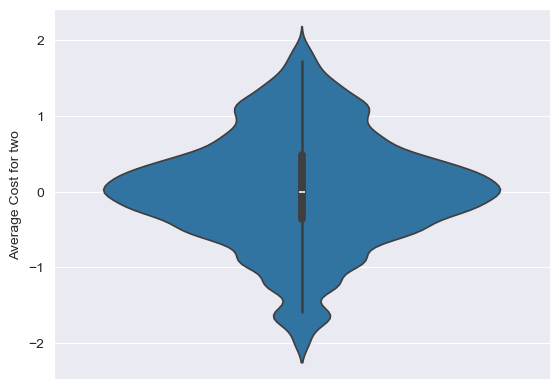

In [295]:
sns.violinplot(data_preprocessing['Average Cost for two'])
plt.show()

In [296]:
data_preprocessing['Average Cost for two']

5      -1.861717
6      -1.742779
7      -0.933130
9      -1.225364
10     -1.636255
          ...   
9513    1.414861
9514    1.601056
9515    1.828959
9517    1.828959
9519    1.414861
Name: Average Cost for two, Length: 6702, dtype: float64

In [297]:
Highly_Skewed

[{'Average Cost for two': 31.165193264167133},
 {'Global_price': 10.365033616837666}]

In [298]:
Robust = RobustScaler()

In [299]:
data_preprocessing['Global_price'] = Robust.fit_transform(np.log(data_preprocessing[['Global_price']]))

In [300]:
data_preprocessing['Global_price']

5       1.000000
6       1.136598
7       2.014455
9       1.681175
10      1.257984
          ...   
9513    0.168233
9514    0.313964
9515    0.557493
9517    0.557493
9519    0.168233
Name: Global_price, Length: 6702, dtype: float64

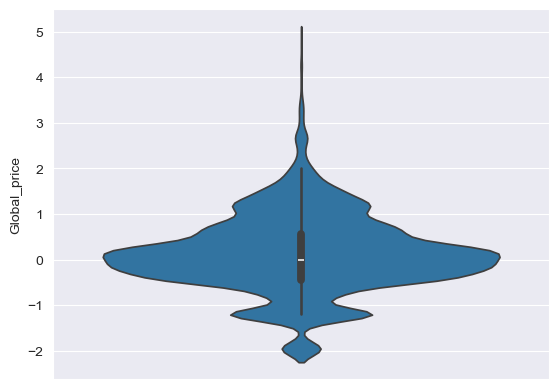

In [301]:
sns.violinplot(data_preprocessing['Global_price'])
plt.show()

In [302]:
data_preprocessing['Global_price'].describe()

count    6702.000000
mean        0.141026
std         0.857226
min        -1.955449
25%        -0.442507
50%         0.000000
75%         0.557493
max         4.826905
Name: Global_price, dtype: float64

In [303]:
Q1,Q3 = np.percentile((data_preprocessing['Global_price'].sort_values()), [25,75])
IQR = Q3-Q1
lower_limit = (Q1 - 1.5 *IQR)
upper_limit = (Q3 + 1.5 * IQR)

In [304]:
print(f'lower limit is {lower_limit} and the upper limit is {upper_limit}')

lower limit is -1.9425070493497598 and the upper limit is 2.05749295065024


In [305]:
data_preprocessing[data_preprocessing['Global_price'] > 2.5]['Global_price']

18      2.616959
54      2.770926
67      2.681175
123     2.681175
125     2.681175
          ...   
8576    3.498292
8577    3.269412
8578    3.154426
9502    3.014455
9503    3.821435
Name: Global_price, Length: 83, dtype: float64

In [306]:
data_preprocessing.drop(data_preprocessing[(data_preprocessing['Global_price'] > upper_limit) | (data_preprocessing['Global_price'] < lower_limit)].index, axis = 0, inplace= True)

In [307]:
data_preprocessing['Global_price'].describe()

count    6427.000000
mean        0.137062
std         0.721290
min        -1.198978
25%        -0.198978
50%         0.168233
75%         0.557493
max         2.014455
Name: Global_price, dtype: float64

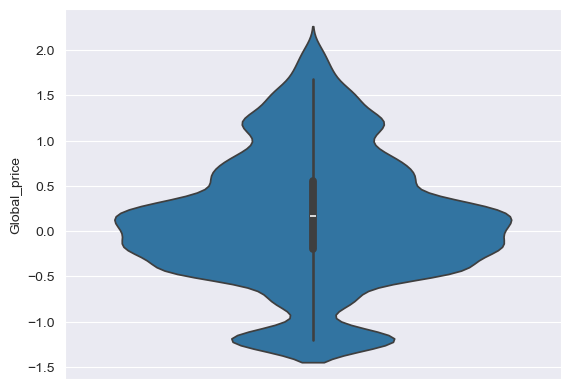

In [308]:
sns.violinplot(data_preprocessing['Global_price'])
plt.show()

In [309]:
Skewed

[{'Country Code': 2.6295586486942417},
 {'Longitude': -2.738417489275971},
 {'Latitude': -3.3023454245298742},
 {'Votes': 7.954144224030151}]

In [310]:
mini = MinMaxScaler()

In [311]:
np.log(data_preprocessing['Votes']).describe()

count    6427.000000
mean        4.004764
std         1.508209
min         1.386294
25%         2.833213
50%         3.931826
75%         5.043425
max         9.299632
Name: Votes, dtype: float64

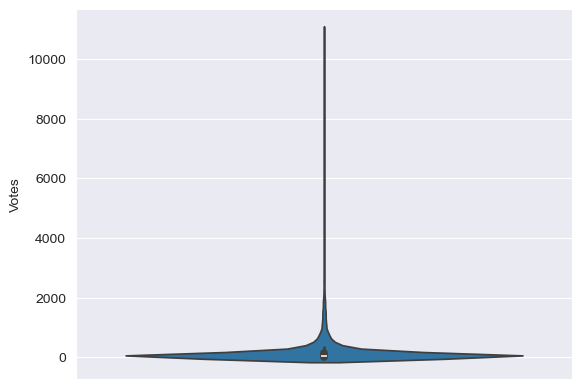

In [312]:
sns.violinplot(data_preprocessing['Votes'])
plt.show()

In [313]:
data_preprocessing['Votes'] = Robust.fit_transform(np.log(data_preprocessing[['Votes']] + 1))

In [314]:
data_preprocessing['Votes'].describe()

count    6427.000000
mean        0.044540
std         0.678294
min        -1.084428
25%        -0.491262
50%         0.000000
75%         0.508738
max         2.476740
Name: Votes, dtype: float64

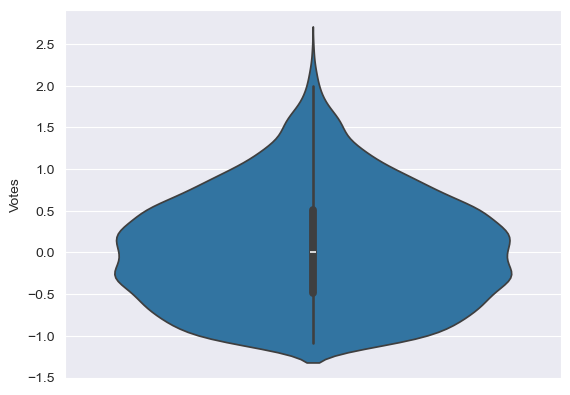

In [315]:
sns.violinplot(data_preprocessing['Votes'])
plt.show()

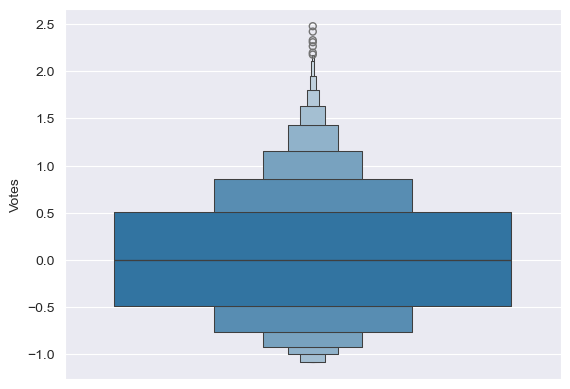

In [316]:
sns.boxenplot(data_preprocessing['Votes'])
plt.show()

In [317]:
Skewed

[{'Country Code': 2.6295586486942417},
 {'Longitude': -2.738417489275971},
 {'Latitude': -3.3023454245298742},
 {'Votes': 7.954144224030151}]

In [318]:
Non_Skewed

[{'Price range': 0.6427198075148313},
 {'Aggregate rating': 0.2265632990270885},
 {'Restaurant ID': nan}]

In [319]:
data_preprocessing['Price range'] = mini.fit_transform(data_preprocessing[['Price range']])

In [320]:
data_preprocessing['Price range'].unique()

array([0.66666667, 1.        , 0.33333333, 0.        ])

In [321]:
data_preprocessing['Aggregate rating']

5       3.1
6       3.7
7       3.7
9       4.1
10      3.1
       ... 
9513    2.5
9514    4.2
9515    4.2
9517    4.2
9519    4.1
Name: Aggregate rating, Length: 6427, dtype: float64

In [322]:
Correlation = data_preprocessing.select_dtypes(include=(np.number))

In [323]:
Correlation.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Votes', 'Global_price',
       'Restaurant ID'],
      dtype='object')

In [324]:
#Dropping Country Code, Longitude and Latitude, Restaurant Id
Drop = ['Country Code', 'Longitude' , 'Latitude', 'Restaurant ID']
#Correlation.drop(columns=Drop , axis = 1, inplace = True)

In [325]:
Correlate = Correlation.corr()

In [326]:
Correlation

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Global_price,Restaurant ID
5,30,-47.915667,-15.831000,-1.861717,0.666667,3.1,-0.719315,1.000000,NaN
6,30,-47.907500,-15.820000,-1.742779,0.666667,3.7,-0.812240,1.136598,NaN
7,30,-47.910167,-15.827333,-0.933130,1.000000,3.7,-1.000000,2.014455,NaN
9,30,-47.923667,-15.831333,-1.225364,1.000000,4.1,-0.641956,1.681175,NaN
10,30,-48.019000,-15.837167,-1.636255,1.000000,3.1,-0.763450,1.257984,NaN
...,...,...,...,...,...,...,...,...,...
9513,191,79.855819,6.899175,1.414861,0.666667,2.5,0.274163,0.168233,5800156.0
9514,191,79.852248,6.904392,1.601056,0.666667,4.2,0.517559,0.313964,5801078.0
9515,191,0.000000,0.000000,1.828959,0.666667,4.2,0.553952,0.557493,5800316.0
9517,191,79.852928,6.904581,1.828959,0.666667,4.2,0.791040,0.557493,5800433.0


In [327]:
Correlate

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Global_price,Restaurant ID
Country Code,1.000000,-0.315022,-0.435186,-0.177140,0.217995,0.200862,0.126892,0.162825,0.002498
Longitude,-0.315022,1.000000,0.807924,0.146062,-0.161477,-0.148324,0.052620,-0.102612,-0.083221
Latitude,-0.435186,0.807924,1.000000,0.049352,-0.246169,-0.266575,-0.089425,-0.185637,-0.062206
Average Cost for two,-0.177140,0.146062,0.049352,1.000000,0.775552,0.242818,0.442138,0.869912,-0.156703
Price range,0.217995,-0.161477,-0.246169,0.775552,1.000000,0.384325,0.474264,0.898571,-0.141007
Aggregate rating,0.200862,-0.148324,-0.266575,0.242818,0.384325,1.000000,0.612991,0.345772,0.215989
Votes,0.126892,0.052620,-0.089425,0.442138,0.474264,0.612991,1.000000,0.480004,-0.170668
Global_price,0.162825,-0.102612,-0.185637,0.869912,0.898571,0.345772,0.480004,1.000000,-0.136310
Restaurant ID,0.002498,-0.083221,-0.062206,-0.156703,-0.141007,0.215989,-0.170668,-0.136310,1.000000


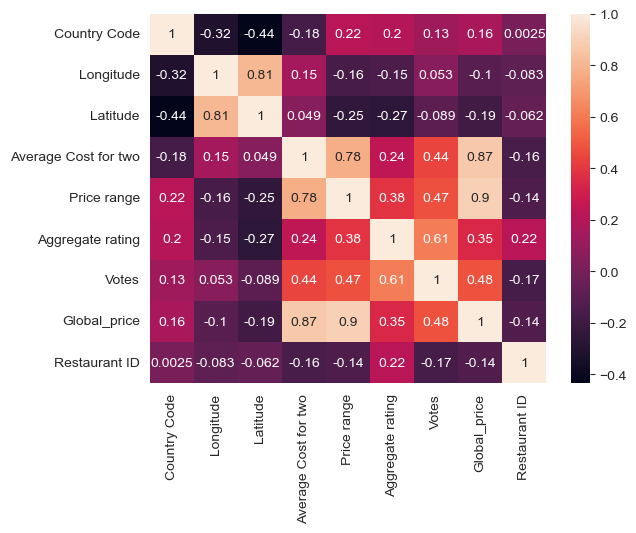

In [328]:
sns.heatmap(Correlate, annot=True)
plt.show()

#### Categorical_Data Encoding

In [329]:
data_preprocessing.select_dtypes(include=object).columns

Index(['Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Rating color',
       'Rating text', 'Countries', 'Address', 'Locality', 'Locality Verbose',
       'Switch to order menu'],
      dtype='object')

In [330]:
Categorical = pd.get_dummies(data = data_preprocessing[['Currency', 'Has Table booking', 'Has Online delivery','Is delivering now', 'Rating color', 'Rating text', 'Countries',]])

In [331]:
Categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6427 entries, 5 to 9519
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Currency_Brazilian Real(R$)     6427 non-null   bool 
 1   Currency_Emirati Diram(AED)     6427 non-null   bool 
 2   Currency_Indian Rupees(Rs.)     6427 non-null   bool 
 3   Currency_Qatari Rial(QR)        6427 non-null   bool 
 4   Currency_Rand(R)                6427 non-null   bool 
 5   Currency_Sri Lankan Rupee(LKR)  6427 non-null   bool 
 6   Currency_Turkish Lira(TL)       6427 non-null   bool 
 7   Has Table booking_No            6427 non-null   bool 
 8   Has Table booking_Yes           6427 non-null   bool 
 9   Has Online delivery_No          6427 non-null   bool 
 10  Has Online delivery_Yes         6427 non-null   bool 
 11  Is delivering now_No            6427 non-null   bool 
 12  Is delivering now_Yes           6427 non-null   bool 
 13  Rating c

In [332]:
Categorical = Categorical.astype(int)

In [333]:
processed = pd.concat([Correlation , Categorical] , axis = 1)

In [334]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6427 entries, 5 to 9519
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Code                    6427 non-null   int64  
 1   Longitude                       6427 non-null   float64
 2   Latitude                        6427 non-null   float64
 3   Average Cost for two            6427 non-null   float64
 4   Price range                     6427 non-null   float64
 5   Aggregate rating                6427 non-null   float64
 6   Votes                           6427 non-null   float64
 7   Global_price                    6427 non-null   float64
 8   Restaurant ID                   728 non-null    float64
 9   Currency_Brazilian Real(R$)     6427 non-null   int32  
 10  Currency_Emirati Diram(AED)     6427 non-null   int32  
 11  Currency_Indian Rupees(Rs.)     6427 non-null   int32  
 12  Currency_Qatari Rial(QR)        6427 no

In [335]:
processed

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Global_price,Restaurant ID,Currency_Brazilian Real(R$),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Poor,Rating text_Very Good,Countries_Brazil,Countries_India,Countries_Qatar,Countries_South Africa,Countries_Sri Lanka,Countries_Turkey,Countries_UAE
5,30,-47.915667,-15.831000,-1.861717,0.666667,3.1,-0.719315,1.000000,NaN,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6,30,-47.907500,-15.820000,-1.742779,0.666667,3.7,-0.812240,1.136598,NaN,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
7,30,-47.910167,-15.827333,-0.933130,1.000000,3.7,-1.000000,2.014455,NaN,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
9,30,-47.923667,-15.831333,-1.225364,1.000000,4.1,-0.641956,1.681175,NaN,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
10,30,-48.019000,-15.837167,-1.636255,1.000000,3.1,-0.763450,1.257984,NaN,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,191,79.855819,6.899175,1.414861,0.666667,2.5,0.274163,0.168233,5800156.0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9514,191,79.852248,6.904392,1.601056,0.666667,4.2,0.517559,0.313964,5801078.0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9515,191,0.000000,0.000000,1.828959,0.666667,4.2,0.553952,0.557493,5800316.0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9517,191,79.852928,6.904581,1.828959,0.666667,4.2,0.791040,0.557493,5800433.0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [336]:
processed.corr()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Global_price,Restaurant ID,Currency_Brazilian Real(R$),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Poor,Rating text_Very Good,Countries_Brazil,Countries_India,Countries_Qatar,Countries_South Africa,Countries_Sri Lanka,Countries_Turkey,Countries_UAE
Country Code,1.000000,-0.315022,-0.435186,-0.177140,0.217995,0.200862,0.126892,0.162825,0.002498,0.067468,0.463454,-0.917024,0.152069,0.652805,0.351625,0.439780,0.038409,-0.038409,0.063136,-0.063136,0.010219,-0.010219,0.109655,0.218587,-0.148609,-0.009889,-0.023722,-0.148609,0.109655,-0.023722,-0.009889,0.218587,0.067468,-0.917024,0.152069,0.652805,0.351625,0.439780,0.463454
Longitude,-0.315022,1.000000,0.807924,0.146062,-0.161477,-0.148324,0.052620,-0.102612,-0.083221,-0.498054,-0.064095,0.480379,-0.032500,-0.270789,0.003884,-0.143321,-0.071953,0.071953,-0.145787,0.145787,-0.015309,0.015309,-0.093186,-0.109473,0.093392,0.031616,-0.006649,0.093392,-0.093186,-0.006649,0.031616,-0.109473,-0.498054,0.480379,-0.032500,-0.270789,0.003884,-0.143321,-0.064095
Latitude,-0.435186,0.807924,1.000000,0.049352,-0.246169,-0.266575,-0.089425,-0.185637,-0.062206,-0.397080,-0.008064,0.563309,-0.002714,-0.608075,-0.116249,0.095848,-0.066449,0.066449,-0.167015,0.167015,-0.020544,0.020544,-0.171481,-0.210979,0.188125,0.040868,-0.017042,0.188125,-0.171481,-0.017042,0.040868,-0.210979,-0.397080,0.563309,-0.002714,-0.608075,-0.116249,0.095848,-0.008064
Average Cost for two,-0.177140,0.146062,0.049352,1.000000,0.775552,0.242818,0.442138,0.869912,-0.156703,-0.166992,-0.150942,0.218570,-0.066171,-0.076327,0.091384,-0.146255,-0.571109,0.571109,-0.109272,0.109272,-0.020485,0.020485,0.053419,0.184656,-0.264554,0.011665,0.139264,-0.264554,0.053419,0.139264,0.011665,0.184656,-0.166992,0.218570,-0.066171,-0.076327,0.091384,-0.146255,-0.150942
Price range,0.217995,-0.161477,-0.246169,0.775552,1.000000,0.384325,0.474264,0.898571,-0.141007,0.141668,0.074819,-0.251616,0.030575,0.173562,0.040022,0.085567,-0.516438,0.516438,-0.020728,0.020728,-0.006776,0.006776,0.150364,0.298069,-0.353969,-0.016917,0.136349,-0.353969,0.150364,0.136349,-0.016917,0.298069,0.141668,-0.251616,0.030575,0.173562,0.040022,0.085567,0.074819
Aggregate rating,0.200862,-0.148324,-0.266575,0.242818,0.384325,1.000000,0.612991,0.345772,0.215989,0.103779,0.078501,-0.219854,0.013657,0.145325,0.041246,0.096537,-0.146128,0.146128,-0.014546,0.014546,0.016541,-0.016541,0.363736,0.558314,-0.685970,-0.352950,0.372897,-0.685970,0.363736,0.372897,-0.352950,0.558314,0.103779,-0.219854,0.013657,0.145325,0.041246,0.096537,0.078501
Votes,0.126892,0.052620,-0.089425,0.442138,0.474264,0.612991,1.000000,0.480004,-0.170668,-0.058203,0.067587,-0.089515,0.018876,0.089935,0.027702,0.061301,-0.279358,0.279358,-0.211783,0.211783,-0.008465,0.008465,0.206754,0.394472,-0.624040,0.003180,0.340944,-0.624040,0.206754,0.340944,0.003180,0.394472,-0.058203,-0.089515,0.018876,0.089935,0.027702,0.061301,0.067587
Global_price,0.162825,-0.102612,-0.185637,0.869912,0.898571,0.345772,0.480004,1.000000,-0.136310,0.121058,0.119141,-0.194328,0.049182,0.150512,-0.008918,-0.014284,-0.564988,0.564988,-0.090329,0.090329,-0.017198,0.017198,0.125410,0.276037,-0.335832,0.002768,0.132823,-0.335832,0.125410,0.132823,0.002768,0.276037,0.121058,-0.194328,0.049182,0.150512,-0.008918,-0.014284,0.119141
Restaurant ID,0.002498,-0.083221,-0.062206,-0.156703,-0.141007,0.215989,-0.170668,-0.136310,1.000000,NaN,NaN,-0.002498,NaN,NaN,0.002498,NaN,-0.032902,0.032902,0.064585,-0.064585,NaN,NaN,0.044557,0.182826,-0.146

In [337]:
processed.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Price range', 'Aggregate rating', 'Votes', 'Global_price',
       'Restaurant ID', 'Currency_Brazilian Real(R$)',
       'Currency_Emirati Diram(AED)', 'Currency_Indian Rupees(Rs.)',
       'Currency_Qatari Rial(QR)', 'Currency_Rand(R)',
       'Currency_Sri Lankan Rupee(LKR)', 'Currency_Turkish Lira(TL)',
       'Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes',
       'Is delivering now_No', 'Is delivering now_Yes',
       'Rating color_Dark Green', 'Rating color_Green', 'Rating color_Orange',
       'Rating color_Red', 'Rating color_Yellow', 'Rating text_Average',
       'Rating text_Excellent', 'Rating text_Good', 'Rating text_Poor',
       'Rating text_Very Good', 'Countries_Brazil', 'Countries_India',
       'Countries_Qatar', 'Countries_South Africa', 'Countries_Sri Lanka',
       'Countries_Turkey', 'Countries_UAE'],
      dtype='object')

In [338]:
processed.drop(columns=['Country Code' , 'Longitude' , 'Latitude' , 'Average Cost for two' , 'Restaurant ID'], inplace=True)
processed.reset_index(drop=True)

,Price range,Aggregate rating,Votes,Global_price,Currency_Brazilian Real(R$),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Poor,Rating text_Very Good,Countries_Brazil,Countries_India,Countries_Qatar,Countries_South Africa,Countries_Sri Lanka,Countries_Turkey,Countries_UAE
0,0.666667,3.1,-0.719315,1.000000,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0.666667,3.7,-0.812240,1.136598,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,1.000000,3.7,-1.000000,2.014455,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
3,1.000000,4.1,-0.641956,1.681175,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,1.000000,3.1,-0.763450,1.257984,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,0.666667,2.5,0.274163,0.168233,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6423,0.666667,4.2,0.517559,0.313964,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6424,0.666667,4.2,0.553952,0.557493,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6425,0.666667,4.2,0.791040,0.557493,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [339]:
processed

,Price range,Aggregate rating,Votes,Global_price,Currency_Brazilian Real(R$),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Poor,Rating text_Very Good,Countries_Brazil,Countries_India,Countries_Qatar,Countries_South Africa,Countries_Sri Lanka,Countries_Turkey,Countries_UAE
5,0.666667,3.1,-0.719315,1.000000,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6,0.666667,3.7,-0.812240,1.136598,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
7,1.000000,3.7,-1.000000,2.014455,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
9,1.000000,4.1,-0.641956,1.681175,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
10,1.000000,3.1,-0.763450,1.257984,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,0.666667,2.5,0.274163,0.168233,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9514,0.666667,4.2,0.517559,0.313964,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9515,0.666667,4.2,0.553952,0.557493,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9517,0.666667,4.2,0.791040,0.557493,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


# Training the Dataset

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#Import allthe necessary libraries for linear regression

In [341]:
#Set the X and Y columns
X = processed.drop(columns='Aggregate rating')
Y = processed['Aggregate rating']

In [342]:
#Split the target and predictor variable to tes data and training data
X_train, X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.3 , random_state=22)

In [343]:
#Call the Linear Regression function
Lmodel = LinearRegression()

In [344]:
#Fit the training data
Lmodel.fit(X_train , Y_train)

LinearRegression()

In [345]:
Y_pred = Lmodel.predict(X_test)

In [346]:
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

0.04040627041636783


In [347]:
print(f'The mean rating of the test data set is {Y_test.mean()} while the mean rating for it\'s prediction is {Y_pred.mean()}...The difference or accuracy of the prediction is {(r2_score(Y_test, Y_pred)) * 100}% ')

The mean rating of the test data set is 3.3683255572835664 while the mean rating for it's prediction is 3.372794486859877...The difference or accuracy of the prediction is 84.43661958239741% 


In [348]:
#Check the accuracy of the prediction
r2 = r2_score(Y_test, Y_pred)
print(r2)

0.8443661958239741


In [349]:
(Y_pred == Y_test).value_counts()

Aggregate rating
False    1929
Name: count, dtype: int64

In [350]:
Y_predt = Lmodel.predict(X_train)

In [351]:
Y_train.mean()

3.3669853268119168

In [352]:
Y_predt.mean()

3.3669853268119168

In [353]:
mset = mean_squared_error(Y_train, Y_predt)
print(mse)

0.04040627041636783


In [354]:
mseter = np.sqrt(mset)

In [355]:
mseter

0.20488354752024993

In [356]:
(Y_predt == Y_train).value_counts()

Aggregate rating
False    4498
Name: count, dtype: int64

In [357]:
r2 = r2_score(Y_train, Y_predt)
print(r2)

0.8443578440690573


In [358]:
X_train

,Price range,Votes,Global_price,Currency_Brazilian Real(R$),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Poor,Rating text_Very Good,Countries_Brazil,Countries_India,Countries_Qatar,Countries_South Africa,Countries_Sri Lanka,Countries_Turkey,Countries_UAE
2184,0.333333,2.127698,0.557493,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
691,0.333333,1.255212,0.168233,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1664,0.000000,-0.866782,-1.198978,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8276,0.000000,-0.210576,-0.756471,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2102,0.666667,0.334147,0.557493,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,0.666667,0.727126,0.756471,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
980,0.000000,-1.000000,-0.442507,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
7354,0.666667,-0.077358,0.756471,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
9298,0.666667,1.496593,1.198978,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [359]:
Performance_Model = LinearRegression()

def feature_selection(T_train, P_train,T_test, P_test , model ,accuracy, drop = None):
    """
    T_train = Target Variable training data
    T_test = Target Variable testing data
    P_train = Predictor Variables training data
    P-test = Predictor Variables testing data
    model = Linear regression model
    accuracy = accuracy of the already trained model
    """
    if drop != None:
        P_train, P_test = P_train.drop(columns = [drop] , axis = 1) , P_test.drop(columns = [drop] , axis = 1)
    for Column in P_train.columns:
        new_train = P_train.drop(columns = [Column] , axis = 1)
        new_test = P_test.drop(columns = [Column])
        model.fit(new_train, T_train)
        new_predict = model.predict(new_test)
        mser = mean_squared_error(T_test, new_predict)
        print(f'{accuracy} , {mser}')
        if mser < accuracy:
            todrop = Column
            return feature_selection(T_train, P_train,T_test, P_test , model ,accuracy, drop = todrop)
            print('test')
        #print(mser)

In [360]:
feature_selection(Y_train,X_train, Y_test,X_test,Performance_Model,mse)

0.04040627041636783 , 0.04042530260334299
0.04040627041636783 , 0.0425132579220089
0.04040627041636783 , 0.04038401885568924
0.04040627041636783 , 0.04041838895091591
0.04040627041636783 , 0.04250981252204244
0.04040627041636783 , 0.04038401885568924
0.04040627041636783 , 0.04040207494411399
0.04040627041636783 , 0.04284093071765977
0.04040627041636783 , 0.04041838895091591
0.04040627041636783 , 0.040418388950915915
0.04040627041636783 , 0.040418388950915915
0.04040627041636783 , 0.04041838895091591
0.04040627041636783 , 0.040418388950915915
0.04040627041636783 , 0.040418388950915915
0.04040627041636783 , 0.040418388950915915
0.04040627041636783 , 0.04042440851096849
0.04040627041636783 , 0.040420315244644026
0.04040627041636783 , 0.040417656574674436
0.04040627041636783 , 0.040418388950915936
0.04040627041636783 , 0.040418388950915915
0.04040627041636783 , 0.04041838895091593
0.04040627041636783 , 0.040418388950915915
0.04040627041636783 , 0.040407590966202424
0.04040627041636783 , 0.

In [361]:
X_test

,Price range,Votes,Global_price,Currency_Brazilian Real(R$),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Poor,Rating text_Very Good,Countries_Brazil,Countries_India,Countries_Qatar,Countries_South Africa,Countries_Sri Lanka,Countries_Turkey,Countries_UAE
7827,0.000000,-0.641956,-0.442507,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2821,0.000000,-0.320978,-0.442507,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2760,0.333333,0.232974,0.000000,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
8983,0.666667,0.351142,1.136598,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
7461,0.333333,-0.157596,0.168233,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,0.333333,-0.196752,0.313964,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8438,0.333333,0.232974,-0.198978,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
7,1.000000,-1.000000,2.014455,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
6458,0.000000,-0.763450,-0.198978,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [362]:
Lmodel.coef_

array([ 0.06873081,  0.09404446, -0.0253256 ,  0.051718  ,  0.00952889,
       -0.01802591,  0.00710861,  0.01129987, -0.02529272, -0.03633674,
        0.00560453, -0.00560453,  0.01539943, -0.01539943,  0.01409057,
       -0.01409057,  0.50181565,  0.27449571, -0.22025496, -0.61415077,
        0.05809436, -0.22025496,  0.50181565,  0.05809436, -0.61415077,
        0.27449571,  0.051718  , -0.01802591,  0.00710861,  0.01129987,
       -0.02529272, -0.03633674,  0.00952889])

# Data Preprocessing for Random Forest

In [363]:
Analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7372 entries, 0 to 9519
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       7372 non-null   object 
 1   Country Code          7372 non-null   int64  
 2   City                  7372 non-null   object 
 3   Longitude             7372 non-null   float64
 4   Latitude              7372 non-null   float64
 5   Cuisines              7372 non-null   object 
 6   Average Cost for two  7372 non-null   int64  
 7   Currency              7372 non-null   object 
 8   Has Table booking     7372 non-null   object 
 9   Has Online delivery   7372 non-null   object 
 10  Is delivering now     7372 non-null   object 
 11  Price range           7372 non-null   int64  
 12  Aggregate rating      7372 non-null   float64
 13  Rating color          7372 non-null   object 
 14  Rating text           7372 non-null   object 
 15  Votes                 7372

In [364]:
r_category = Analysis.select_dtypes(include = object)

In [365]:
r_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7372 entries, 0 to 9519
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Restaurant Name       7372 non-null   object
 1   City                  7372 non-null   object
 2   Cuisines              7372 non-null   object
 3   Currency              7372 non-null   object
 4   Has Table booking     7372 non-null   object
 5   Has Online delivery   7372 non-null   object
 6   Is delivering now     7372 non-null   object
 7   Rating color          7372 non-null   object
 8   Rating text           7372 non-null   object
 9   Countries             7372 non-null   object
 10  Address               826 non-null    object
 11  Locality              826 non-null    object
 12  Locality Verbose      826 non-null    object
 13  Switch to order menu  826 non-null    object
dtypes: object(14)
memory usage: 1.1+ MB


In [366]:
r_category.drop(columns = ['Address', 'Locality' , 'Locality Verbose' , 'Switch to order menu', 'Restaurant Name'], axis = 1, inplace = True)

In [367]:
r_category = pd.get_dummies(r_category)

In [368]:
r_category

,City_Abu Dhabi,City_Agra,City_Ahmedabad,City_Albany,City_Allahabad,City_Amritsar,City_Ankara,City_Armidale,City_Athens,City_Auckland,City_Augusta,City_Aurangabad,City_Balingup,City_Bandung,City_Bangalore,City_Beechworth,City_Bhopal,City_Bhubaneshwar,City_Birmingham,City_Bogor,City_Boise,City_Bras�_lia,City_Cape Town,City_Cedar Rapids/Iowa City,City_Chandigarh,City_Chatham-Kent,City_Chennai,City_Clatskanie,City_Cochrane,City_Coimbatore,City_Colombo,City_Columbus,City_Consort,City_Dalton,City_Davenport,City_Dehradun,City_Des Moines,City_Dicky Beach,City_Doha,City_Dubai,City_Dubuque,City_East Ballina,City_Edinburgh,City_Faridabad,City_Fernley,City_Flaxton,City_Forrest,City_Gainesville,City_Ghaziabad,City_Goa,...,"Cuisines_Turkish, Arabian, Middle Eastern","Cuisines_Turkish, Mediterranean, Middle Eastern",Cuisines_Vietnamese,"Cuisines_Vietnamese, Fish and Chips","Cuisines_Western, Asian, Cafe","Cuisines_Western, Fusion, Fast Food",Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Indonesian Rupiah(IDR),Currency_NewZealand($),Currency_Pounds(��),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Poor,Rating text_Very Good,Countries_Australia,Countries_Brazil,Countries_Canada,Countries_England,Countries_India,Countries_Indonesia,Countries_New Zealand,Countries_Panama,Countries_Qatar,Countries_South Africa,Countries_Sri Lanka,Countries_Turkey,Countries_UAE,Countries_United States
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [369]:
r_numeric = Analysis.select_dtypes(include = np.number)

In [370]:
r_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7372 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          7372 non-null   int64  
 1   Longitude             7372 non-null   float64
 2   Latitude              7372 non-null   float64
 3   Average Cost for two  7372 non-null   int64  
 4   Price range           7372 non-null   int64  
 5   Aggregate rating      7372 non-null   float64
 6   Votes                 7372 non-null   int64  
 7   Global_price          7372 non-null   float64
 8   Restaurant ID         826 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 834.0 KB


In [371]:
r_numeric.drop(columns = ['Country Code' , 'Longitude' , 'Latitude' , 'Average Cost for two' , 'Restaurant ID'] , axis = 1 , inplace = True)

In [372]:
r_numeric

,Price range,Aggregate rating,Votes,Global_price
0,2,3.0,6,10.0
1,1,3.8,9,6.0
2,2,3.7,11,9.0
3,3,3.8,11,11.0
4,2,3.2,11,10.0
...,...,...,...,...
9515,3,4.2,171,10.0
9516,4,4.0,196,15.0
9517,3,4.2,286,10.0
9518,4,4.9,203,14.0


In [373]:
Processed = pd.concat([r_category.astype(int) , r_numeric], axis = 1)

In [374]:
Processed

,City_Abu Dhabi,City_Agra,City_Ahmedabad,City_Albany,City_Allahabad,City_Amritsar,City_Ankara,City_Armidale,City_Athens,City_Auckland,City_Augusta,City_Aurangabad,City_Balingup,City_Bandung,City_Bangalore,City_Beechworth,City_Bhopal,City_Bhubaneshwar,City_Birmingham,City_Bogor,City_Boise,City_Bras�_lia,City_Cape Town,City_Cedar Rapids/Iowa City,City_Chandigarh,City_Chatham-Kent,City_Chennai,City_Clatskanie,City_Cochrane,City_Coimbatore,City_Colombo,City_Columbus,City_Consort,City_Dalton,City_Davenport,City_Dehradun,City_Des Moines,City_Dicky Beach,City_Doha,City_Dubai,City_Dubuque,City_East Ballina,City_Edinburgh,City_Faridabad,City_Fernley,City_Flaxton,City_Forrest,City_Gainesville,City_Ghaziabad,City_Goa,...,"Cuisines_Western, Asian, Cafe","Cuisines_Western, Fusion, Fast Food",Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Indonesian Rupiah(IDR),Currency_NewZealand($),Currency_Pounds(��),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Poor,Rating text_Very Good,Countries_Australia,Countries_Brazil,Countries_Canada,Countries_England,Countries_India,Countries_Indonesia,Countries_New Zealand,Countries_Panama,Countries_Qatar,Countries_South Africa,Countries_Sri Lanka,Countries_Turkey,Countries_UAE,Countries_United States,Price range,Aggregate rating,Votes,Global_price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3.0,6,10.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3.8,9,6.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3.7,11,9.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,3.8,11,11.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3.2,11,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,4.2,171,10.0
9516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,4.0,196,15.0
9517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,4.2,286,10.0
9518,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

# Train the Dataset on a Random Forest Model

In [375]:
from sklearn.ensemble import RandomForestRegressor

In [376]:
r_X = Processed.drop(columns=['Aggregate rating'], axis = 1)
r_Y = Processed['Aggregate rating']

In [377]:
rx_train, rx_test , ry_train , ry_test = train_test_split(r_X , r_Y , test_size= 0.2 , random_state=20)

In [378]:
rfr = RandomForestRegressor(n_estimators = 10 , random_state = 1)

In [379]:
rfr

RandomForestRegressor(n_estimators=10, random_state=1)

In [380]:
rfr.fit(rx_train,ry_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [381]:
ry_predict = rfr.predict(rx_test)

In [382]:
r2 = r2_score(ry_test, ry_predict)
print(r2)

0.8483654581212957


In [383]:
ry_predictrain = rfr.predict(rx_train)

In [384]:
r3 = r2_score(ry_train,ry_predictrain)
print(r3)

0.9723503541433614


In [385]:
rfr.feature_importances_

array([1.22921512e-05, 8.15456744e-05, 4.34286991e-05, ...,
       2.30260085e-03, 4.12315869e-02, 1.41314763e-02])

#### Reduce the amount of features as the high number of features is causing overfitting

In [386]:
r_category = Analysis.select_dtypes(include = object)

In [387]:
r_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7372 entries, 0 to 9519
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Restaurant Name       7372 non-null   object
 1   City                  7372 non-null   object
 2   Cuisines              7372 non-null   object
 3   Currency              7372 non-null   object
 4   Has Table booking     7372 non-null   object
 5   Has Online delivery   7372 non-null   object
 6   Is delivering now     7372 non-null   object
 7   Rating color          7372 non-null   object
 8   Rating text           7372 non-null   object
 9   Countries             7372 non-null   object
 10  Address               826 non-null    object
 11  Locality              826 non-null    object
 12  Locality Verbose      826 non-null    object
 13  Switch to order menu  826 non-null    object
dtypes: object(14)
memory usage: 1.1+ MB


In [388]:
r_category.drop(columns = ['Address', 'Locality' , 'Locality Verbose' , 'Switch to order menu', 'Restaurant Name' , 'Cuisines' , 'City' ] , axis = 1 , inplace = True)

In [389]:
r_category = pd.get_dummies(r_category)

In [385]:
r_category

,City_Abu Dhabi,City_Agra,City_Ahmedabad,City_Albany,City_Allahabad,City_Amritsar,City_Ankara,City_Armidale,City_Athens,City_Auckland,City_Augusta,City_Aurangabad,City_Balingup,City_Bandung,City_Bangalore,City_Beechworth,City_Bhopal,City_Bhubaneshwar,City_Birmingham,City_Bogor,City_Boise,City_Bras�_lia,City_Cape Town,City_Cedar Rapids/Iowa City,City_Chandigarh,City_Chatham-Kent,City_Chennai,City_Clatskanie,City_Cochrane,City_Coimbatore,City_Colombo,City_Columbus,City_Consort,City_Dalton,City_Davenport,City_Dehradun,City_Des Moines,City_Dicky Beach,City_Doha,City_Dubai,City_Dubuque,City_East Ballina,City_Edinburgh,City_Faridabad,City_Fernley,City_Flaxton,City_Forrest,City_Gainesville,City_Ghaziabad,City_Goa,...,"Cuisines_Turkish, Arabian, Middle Eastern","Cuisines_Turkish, Mediterranean, Middle Eastern",Cuisines_Vietnamese,"Cuisines_Vietnamese, Fish and Chips","Cuisines_Western, Asian, Cafe","Cuisines_Western, Fusion, Fast Food",Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Indonesian Rupiah(IDR),Currency_NewZealand($),Currency_Pounds(��),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Poor,Rating text_Very Good,Countries_Australia,Countries_Brazil,Countries_Canada,Countries_England,Countries_India,Countries_Indonesia,Countries_New Zealand,Countries_Panama,Countries_Qatar,Countries_South Africa,Countries_Sri Lanka,Countries_Turkey,Countries_UAE,Countries_United States
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [391]:
processed = pd.concat([r_category.astype(int), r_numeric] , axis = 1)

In [392]:
processed

,Currency_Brazilian Real(R$),Currency_Dollar($),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Indonesian Rupiah(IDR),Currency_NewZealand($),Currency_Pounds(��),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Poor,Rating text_Very Good,Countries_Australia,Countries_Brazil,Countries_Canada,Countries_England,Countries_India,Countries_Indonesia,Countries_New Zealand,Countries_Panama,Countries_Qatar,Countries_South Africa,Countries_Sri Lanka,Countries_Turkey,Countries_UAE,Countries_United States,Price range,Aggregate rating,Votes,Global_price
0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3.0,6,10.0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3.8,9,6.0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3.7,11,9.0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,3.8,11,11.0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3.2,11,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,4.2,171,10.0
9516,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,4.0,196,15.0
9517,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,4.2,286,10.0
9518,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,4.9,203,14.0


In [393]:
r_X = processed.drop(columns=['Aggregate rating'], axis = 1)
r_Y = processed['Aggregate rating']

In [394]:
rx_train, rx_test , ry_train , ry_test = train_test_split(r_X , r_Y , test_size= 0.3 , random_state=20)

In [395]:
rfr = RandomForestRegressor(n_estimators = 100 , random_state = 1)

In [396]:
rfr.fit(rx_train,ry_train)

RandomForestRegressor(random_state=1)

In [397]:
ry_predict = rfr.predict(rx_test)

In [398]:
ry_predictrain = rfr.predict(rx_train)

In [399]:
r2 = r2_score(ry_test, ry_predict)
print(r2)

0.8403085686991675


In [400]:
r3 = r2_score(ry_train, ry_predictrain)
print(r2)

0.8403085686991675
